# Capstone project

# TMDB Movie Analysis

###### Importing necessary libraries

In [8]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [9]:
cr=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_credits.csv")   # loading the two csv files into dataframes

mv=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_movies.csv")

##### Exploring the two loaded datasets

In [10]:
cr.head()   

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [11]:
cr.shape

(4803, 4)

In [12]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [13]:
mv.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   16-07-2012  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   07-03-2012   284139100   

   runtime    status                                         tagline  \
0    162.0  Released                     Enter the World of Pandora.   
1    169.0  Released  At the end of the world, the adventure begins.   
2    148.0  Released                           A Plan No One Escapes   
3    165.0  Released                                 The Legend Ends   
4    132.0  Released            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [14]:
mv.shape

(4803, 18)

In [15]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  title                

##### Merging the two dataframes on common column

In [16]:
movie_df=cr.merge(mv,left_on='movie_id',right_on='id')
movie_df.head()

movie_id                                   title_x  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000   
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  260000000   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  ...  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en  ...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en  ...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en  ...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en  ...   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en  ...   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   16-07-2012  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   07-03-2012   284139100   

  runtime    status                                         tagline  \
0   162.0  Released                     Enter the World of Pandora.   
1   169.0  Released  At the end of the world, the adventure begins.   
2   148.0  Released                           A Plan No One Escapes   
3   165.0  Released                                 The Legend Ends   
4   132.0  Released            Lost in our world, found in another.   

                                    title_y vote_average vote_count  
0                                    Avatar          7.2      11800  
1  Pirates of the Caribbean: At World's End          6.9       4500  
2                                   Spectre          6.3       4466  
3                     The Dark Knight Rises          7.6       9106  
4                               John Carter          6.1       2124  

[5 rows x 22 columns]

In [17]:
movie_df.rename(columns={'title_x':'title'}, inplace=True)  # renaming the duplicated title column name and dropping one
movie_df.drop(columns=['id','title_y'],inplace=True)

##### Dealing with the columns having records in JSON format

In [18]:
# converting the crew column from JSon to string and then extracting director name and creating a new colum.

movie_df['crew'] = movie_df['crew'].apply(json.loads)
movie_df['director'] = movie_df['crew'].apply(lambda x: [crew_member['name'] for crew_member in x if crew_member['job'] == 'Director'][0] if any(crew_member['job'] == 'Director' for crew_member in x) else None)
movie_df = movie_df.drop('crew', axis=1)


# converting the remainig columns in JSON format using json.loads()

json_col= ['genres','keywords','production_companies','production_countries']
for col in json_col:
    movie_df[col]=movie_df[col].apply(lambda x: [item['name'] for item in json.loads(x)])


In [19]:
# # Extracting the names of first two cast from each records and adding to  new columns
# movie_df['cast'] = movie_df['cast'].apply(json.loads)
# movie_df['cast'] = movie_df['cast'].apply(lambda x: ', '.join(x))
# movie_df['cast 1'] = movie_df['cast'].str[0]
# movie_df['cast 2'] = movie_df['cast'].str[1]


In [20]:

movie_df['cast'] = movie_df['cast'].apply(json.loads)
movie_df['cast'] = movie_df['cast'].apply(lambda x: ', '.join([item['name'] for item in x]))
movie_df['cast 1'] = movie_df['cast'].str.split(', ').str[0]
movie_df['cast 2'] = movie_df['cast'].str.split(', ').str[1]

In [21]:
movie_df['genres'] = movie_df['genres'].apply(json.loads)
movie_df['genres'] = movie_df['genres'].apply(lambda x: ', '.join([item['name'] for item in x]))

movie_df['main genre'] = movie_df['genres'].str.split(', ').str[0]
movie_df['sub genre'] = movie_df['genres'].str.split(', ').str[1]

In [22]:
json_col = ['keywords', 'production_companies', 'production_countries']

for col in json_col:
    movie_df[col] = movie_df[col].apply(lambda x: [item['name'] for item in json.loads(x)])
    movie_df[col] = movie_df[col].str[0]  

In [23]:

# for col in json_col:
#     movie_df[col] = movie_df[col].apply(lambda x: ', '.join(x))

In [24]:
movie_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast     budget  \
0  Sam Worthington, Zoe Saldana, Sigourney Weaver...  237000000   
1  Johnny Depp, Orlando Bloom, Keira Knightley, S...  300000000   
2  Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...  245000000   
3  Christian Bale, Michael Caine, Gary Oldman, An...  250000000   
4  Taylor Kitsch, Lynn Collins, Samantha Morton, ...  260000000   

                                        genres  \
0  Action, Adventure, Fantasy, Science Fiction   
1                   Adventure, Fantasy, Action   
2                     Action, Adventure, Crime   
3               Action, Crime, Drama, Thriller   
4           Action, Adventure, Science Fiction   

                                       homepage        keywords  \
0                   http://www.avatarmovie.com/   culture clash   
1  http://disney.go.com/disneypictures/pirates/           ocean   
2   http://www.sonypictures.com/movies/spectre/             spy   
3            http://www.thedarkknightrises.com/       dc comics   
4          http://movies.disney.com/john-carter  based on novel   

  original_language                                           overview  \
0                en  In the 22nd century, a paraplegic Marine is di...   
1                en  Captain Barbossa, long believed to be dead, ha...   
2                en  A cryptic message from Bond’s past sends him o...   
3                en  Following the death of District Attorney Harve...   
4                en  John Carter is a war-weary, former military ca...   

   popularity  ... runtime    status  \
0  150.437577  ...   162.0  Released   
1  139.082615  ...   169.0  Released   
2  107.376788  ...   148.0  Released   
3  112.312950  ...   165.0  Released   
4   43.926995  ...   132.0  Released   

                                          tagline  vote_average  vote_count  \
0                     Enter the World of Pandora.           7.2       11800   
1  At the end of the world, the adventure begins.           6.9        4500   
2                           A Plan No One Escapes           6.3        4466   
3                                 The Legend Ends           7.6        9106   
4            Lost in our world, found in another.           6.1        2124   

            director           cast 1           cast 2  main genre  sub genre  
0      James Cameron  Sam Worthington      Zoe Saldana      Action  Adventure  
1     Gore Verbinski      Johnny Depp    Orlando Bloom   Adventure    Fantasy  
2         Sam Mendes     Daniel Craig  Christoph Waltz      Action  Adventure  
3  Christopher Nolan   Christian Bale    Michael Caine      Action      Crime  
4     Andrew Stanton    Taylor Kitsch     Lynn Collins      Action  Adventure  

[5 rows x 24 columns]

In [25]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   budget                4803 non-null   int64  
 4   genres                4803 non-null   object 
 5   homepage              1712 non-null   object 
 6   keywords              4391 non-null   object 
 7   original_language     4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4452 non-null   object 
 11  production_countries  4629 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  status               

In [26]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']  #Adding a new column of profit
movie_df['profit'].head()

0    2550965087
1     661000000
2     635674609
3     834939099
4      24139100
Name: profit, dtype: int64

In [27]:
movie_df.isnull().sum()      #checking for null values

movie_id                   0
title                      0
cast                       0
budget                     0
genres                     0
homepage                3091
keywords                 412
original_language          0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
vote_average               0
vote_count                 0
director                  30
cast 1                     0
cast 2                    53
main genre                 0
sub genre                928
profit                     0
dtype: int64

In [28]:
movie_df.duplicated().sum()   # checking for duplicated values

0

In [29]:
movie_df = movie_df.dropna(subset=['release_date','director','cast 2','production_companies','production_countries'])   #dropping the null value records
movie_df['release_year'] = pd.to_datetime(movie_df['release_date']).dt.year        #Adding a new column of release year

In [30]:
movie_df = movie_df.drop(columns=['homepage','overview','tagline','cast','genres','keywords'], axis=1)   #dropping columnns with high % of missing values and unimportant columns
movie_df['runtime']=movie_df['runtime'].fillna(movie_df['runtime'].mean())
movie_df['sub genre'] = movie_df['sub genre'].fillna('none')

In [31]:
movie_df

movie_id                                     title     budget  \
0        19995                                    Avatar  237000000   
1          285  Pirates of the Caribbean: At World's End  300000000   
2       206647                                   Spectre  245000000   
3        49026                     The Dark Knight Rises  250000000   
4        49529                               John Carter  260000000   
...        ...                                       ...        ...   
4795    124606                                      Bang          0   
4796     14337                                    Primer       7000   
4798      9367                               El Mariachi     220000   
4800    231617                 Signed, Sealed, Delivered          0   
4802     25975                         My Date with Drew          0   

     original_language  popularity      production_companies  \
0                   en  150.437577   Ingenious Film Partners   
1                   en  139.082615      Walt Disney Pictures   
2                   en  107.376788         Columbia Pictures   
3                   en  112.312950        Legendary Pictures   
4                   en   43.926995      Walt Disney Pictures   
...                ...         ...                       ...   
4795                en    0.918116              Asylum Films   
4796                en   23.307949                 Thinkfilm   
4798                es   14.269792         Columbia Pictures   
4800                en    1.444476     Front Street Pictures   
4802                en    1.929883  rusty bear entertainment   

          production_countries release_date     revenue  runtime    status  \
0     United States of America   10-12-2009  2787965087    162.0  Released   
1     United States of America   19-05-2007   961000000    169.0  Released   
2               United Kingdom   26-10-2015   880674609    148.0  Released   
3     United States of America   16-07-2012  1084939099    165.0  Released   
4     United States of America   07-03-2012   284139100    132.0  Released   
...                        ...          ...         ...      ...       ...   
4795  United States of America   09-09-1995           0     98.0  Released   
4796  United States of America   08-10-2004      424760     77.0  Released   
4798                    Mexico   04-09-1992     2040920     81.0  Released   
4800  United States of America   13-10-2013           0    120.0  Released   
4802  United States of America   05-08-2005           0     90.0  Released   

      vote_average  vote_count           director           cast 1  \
0              7.2       11800      James Cameron  Sam Worthington   
1              6.9        4500     Gore Verbinski      Johnny Depp   
2              6.3        4466         Sam Mendes     Daniel Craig   
3              7.6        9106  Christopher Nolan   Christian Bale   
4              6.1        2124     Andrew Stanton    Taylor Kitsch   
...            ...         ...                ...              ...   
4795           6.0           1    Ash Baron-Cohen   Darling Narita   
4796           6.9         658      Shane Carruth    Shane Carruth   
4798           6.6         238   Robert Rodriguez  Carlos Gallardo   
4800           7.0           6        Scott Smith      Eric Mabius   
4802           6.3          16   Brian Herzlinger   Drew Barrymore   

                cast 2       main genre  sub genre      profit  release_year  
0          Zoe Saldana           Action  Adventure  2550965087          2009  
1        Orlando Bloom        Adventure    Fantasy   661000000          2007  
2      Christoph Waltz           Action  Adventure   635674609          2015  
3        Michael Caine           Action      Crime   834939099          2012  
4         Lynn Collins           Action  Adventure    24139100          2012  
...                ...              ...        ...         ...           ...  
4795      Peter Greene            Drama       none   

In [32]:
movie_df.shape  # checking for dimension of final dataframe

(4419, 20)

In [33]:
movie_df.describe()    # summary statistics of numerical columns

movie_id        budget   popularity       revenue      runtime  \
count    4419.000000  4.419000e+03  4419.000000  4.419000e+03  4419.000000   
mean    52942.126273  3.144989e+07    23.219085  8.933932e+07   108.271390   
std     84762.180695  4.155871e+07    32.594522  1.679270e+08    20.920031   
min         5.000000  0.000000e+00     0.001586  0.000000e+00     0.000000   
25%      8478.500000  2.600000e+06     6.249772  1.050000e+01    95.000000   
50%     13483.000000  1.700000e+07    14.752587  2.583662e+07   105.000000   
75%     50646.500000  4.200000e+07    30.030585  1.016357e+08   118.000000   
max    433715.000000  3.800000e+08   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count        profit  release_year  
count   4419.000000   4419.000000  4.419000e+03   4419.000000  
mean       6.180810    748.689296  5.788942e+07   2002.181942  
std        1.019384   1270.337787  1.407760e+08     12.704067  
min        0.000000      0.000000 -1.657101e+08   1916.000000  
25%        5.700000     80.000000 -1.298568e+06   1999.000000  
50%        6.300000    285.000000  6.361217e+06   2005.000000  
75%        6.800000    826.000000  6.309199e+07   2010.000000  
max       10.000000  13752.000000  2.550965e+09   2016.000000

In [34]:
movie_df.describe(exclude='number')     #summary statistics of non numerical columns

title original_language production_companies  \
count       4419              4419                 4419   
unique      4417                34                 1294   
top     The Host                en   Paramount Pictures   
freq           2              4153                  280   

            production_countries release_date    status          director  \
count                       4419         4419      4419              4419   
unique                        65         3117         2              2088   
top     United States of America   18-07-2013  Released  Steven Spielberg   
freq                        2960            7      4418                27   

              cast 1            cast 2 main genre sub genre  
count           4419              4419       4419      4419  
unique          1866              2483         21        20  
top     Bruce Willis  Jennifer Aniston      Drama      none  
freq              30                15       1090       762

In [35]:
#movie_df= movie_df.drop(movie_df[(movie_df['budget']<1) | (movie_df['revenue']<1) | (movie_df['runtime']==0)].index)

In [36]:
movie_df.to_csv('C:/Users/saran/OneDrive/Documents/TMDB_movies.csv')    ## exporting as csv file

In [37]:
movie_df['release_year'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4795    1995
4796    2004
4798    1992
4800    2013
4802    2005
Name: release_year, Length: 4419, dtype: int64>

### EDA

In [38]:
categorical=[]
continuous=[]
def sort(df):   
    for column in df.columns:
        if df[column].dtype=='object' or df[column].nunique() <= 10:
            categorical.append(column)
        else:
            continuous.append(column)
    
    return categorical, continuous

In [39]:
sort(movie_df)

(['title',
  'original_language',
  'production_companies',
  'production_countries',
  'release_date',
  'status',
  'director',
  'cast 1',
  'cast 2',
  'main genre',
  'sub genre'],
 ['movie_id',
  'budget',
  'popularity',
  'revenue',
  'runtime',
  'vote_average',
  'vote_count',
  'profit',
  'release_year'])

In [40]:
categorical

['title',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'status',
 'director',
 'cast 1',
 'cast 2',
 'main genre',
 'sub genre']

In [41]:
continuous

['movie_id',
 'budget',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'profit',
 'release_year']

In [42]:
def count(col):                               #defining a function for count plot
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=movie_df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [43]:
def pie(col):                               #defining a function for pie chart
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 2)
    df_counts = movie_df[col].value_counts()
    plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.show()

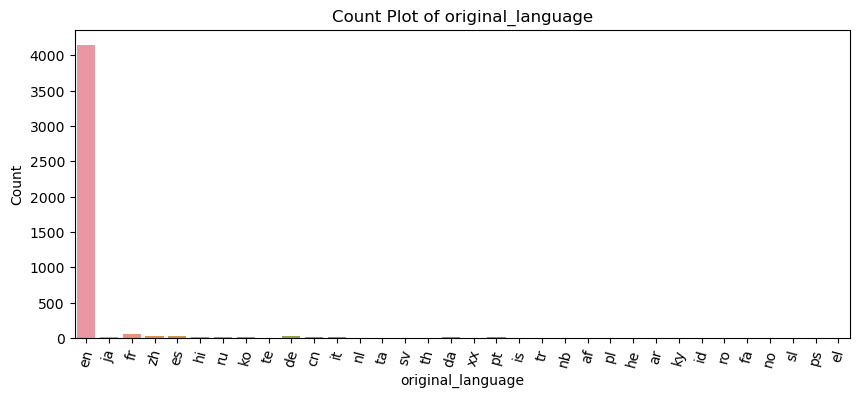

In [44]:
count('original_language')

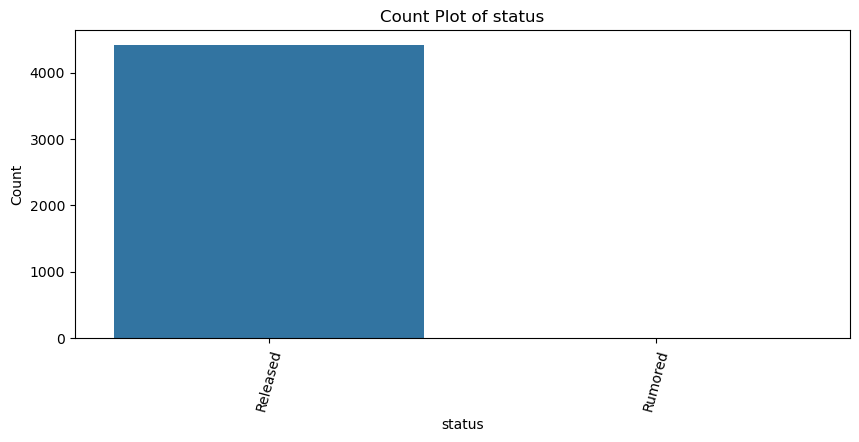

In [45]:
count('status')

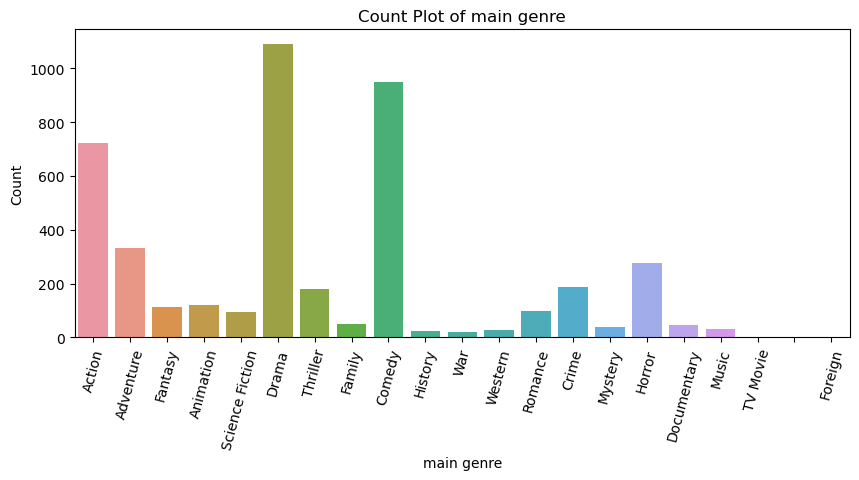

In [46]:
count('main genre')

In [47]:
movie_df['main genre'].value_counts()

Drama              1090
Comedy              949
Action              723
Adventure           334
Horror              278
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance             100
Science Fiction      94
Family               50
Documentary          48
Mystery              40
Music                33
Western              27
History              23
War                  22
TV Movie              3
                      2
Foreign               1
Name: main genre, dtype: int64

In [48]:
def num_plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram
    axes[0].hist(movie_df[col].dropna(), bins=20, edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(data=movie_df, y=col, ax=axes[1])
    axes[1].set_ylabel(col)
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

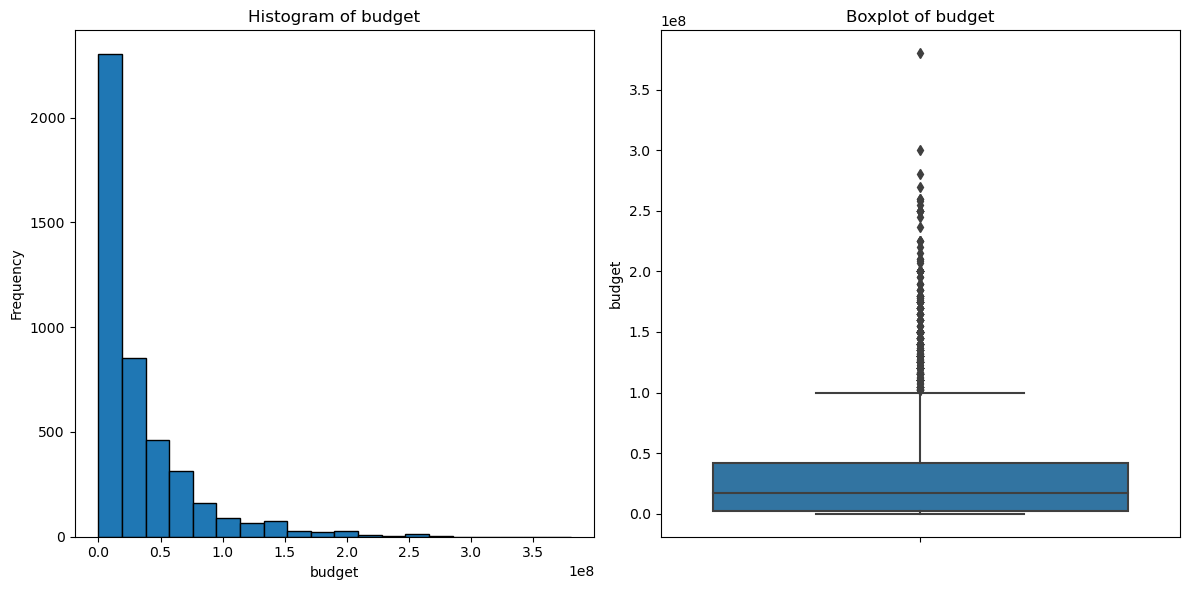

In [49]:
num_plot('budget')

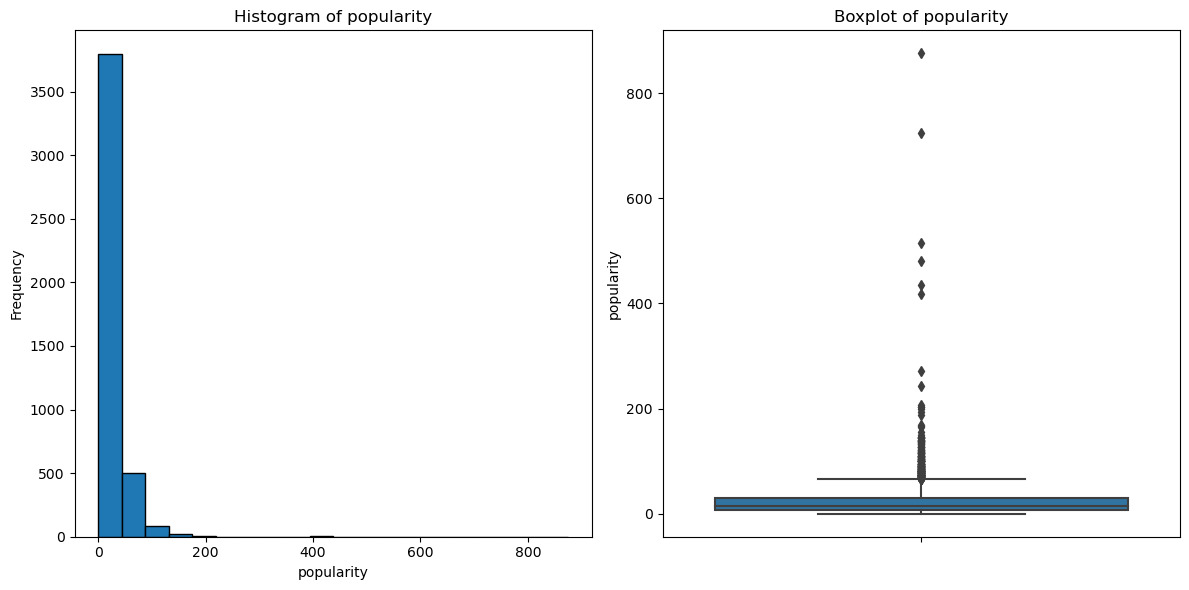

In [50]:
num_plot('popularity')

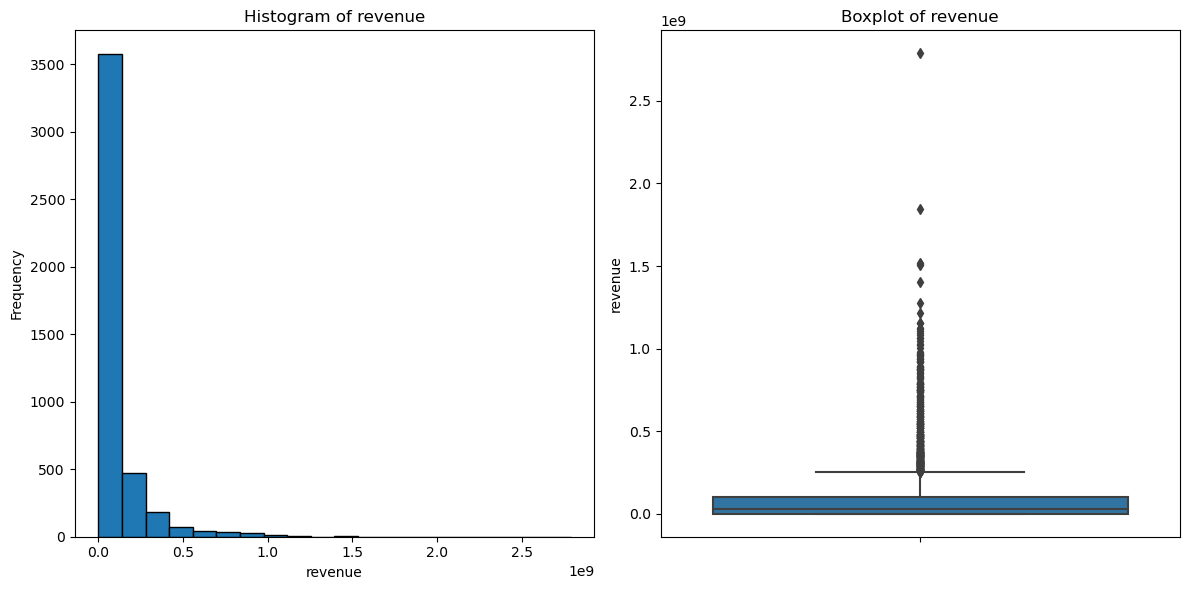

In [51]:
num_plot('revenue')

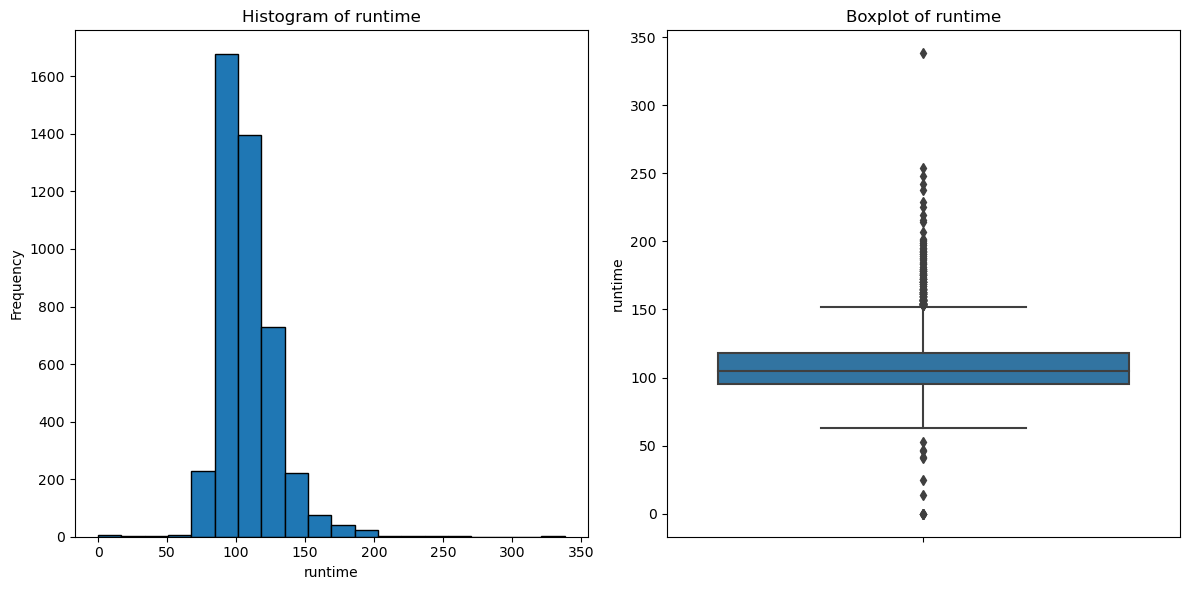

In [52]:
num_plot('runtime')

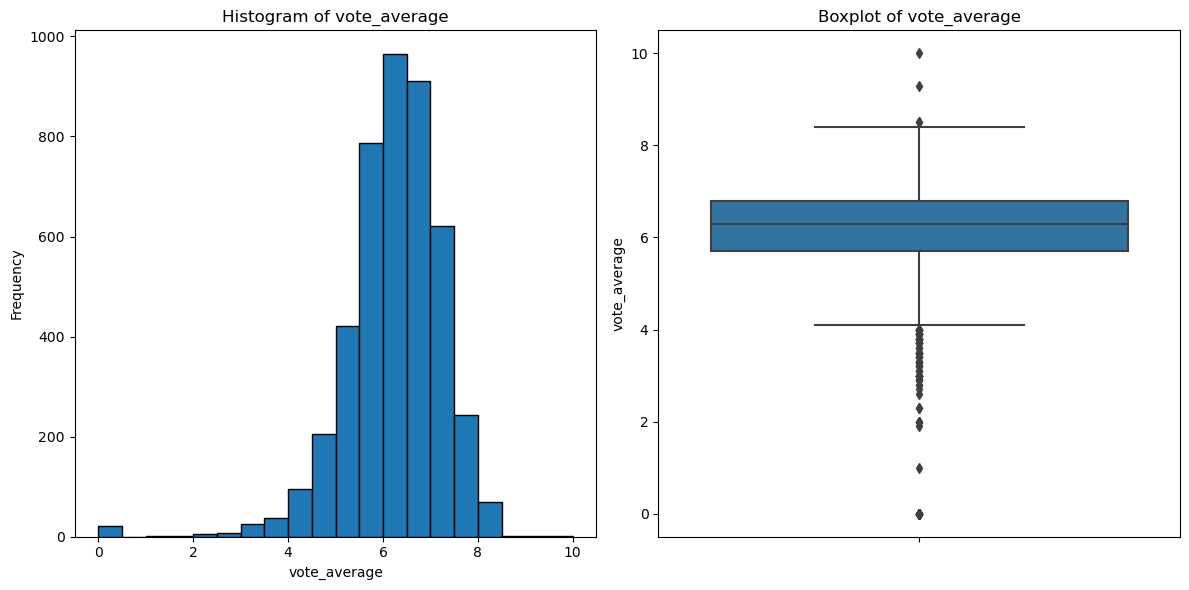

In [53]:
num_plot('vote_average')

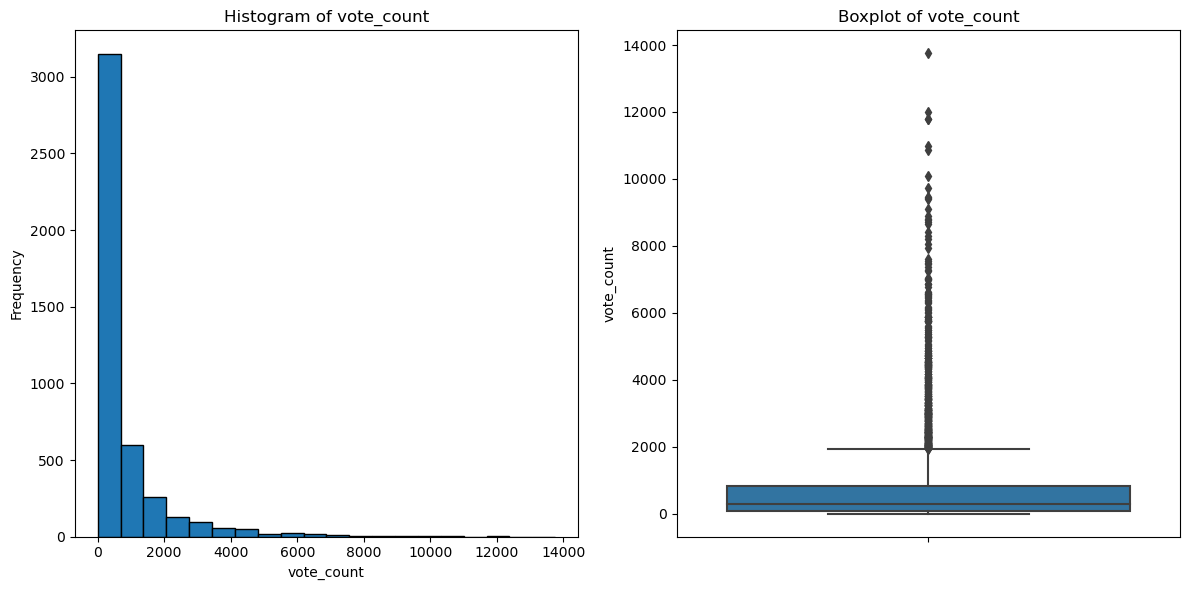

In [54]:
num_plot('vote_count')

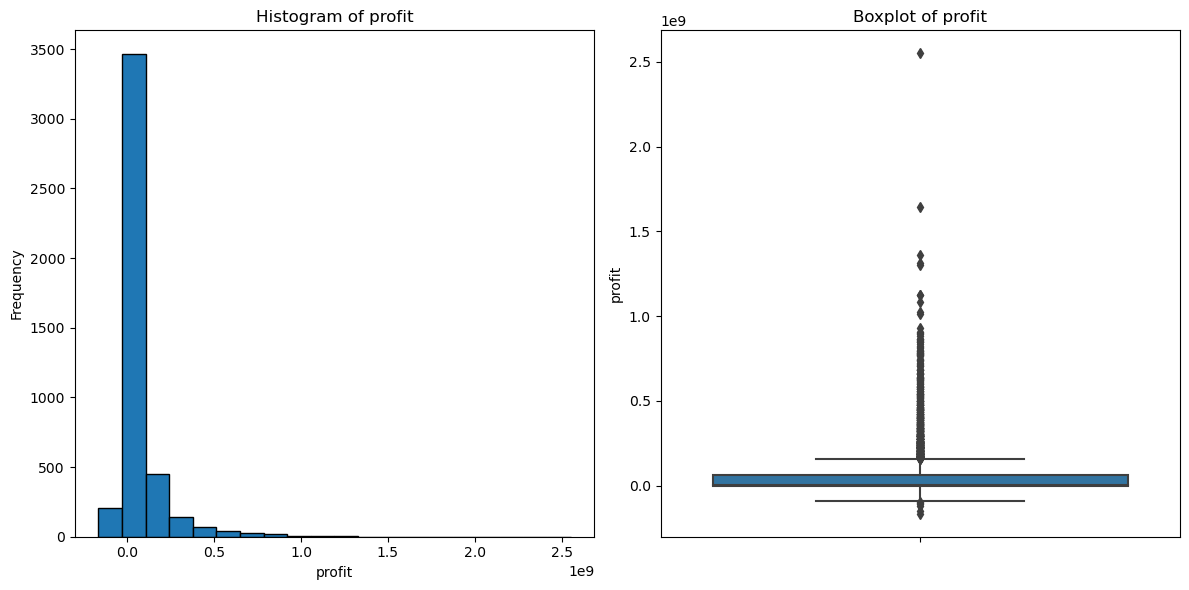

In [55]:
num_plot('profit')

<AxesSubplot:ylabel='Frequency'>

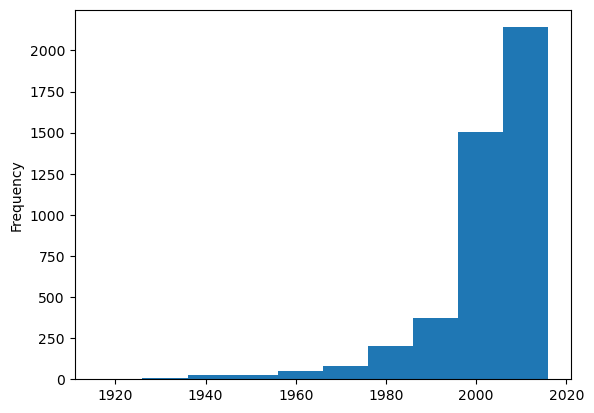

In [56]:
movie_df.release_year.plot(kind='hist',x="release_year",y="Distrbution")

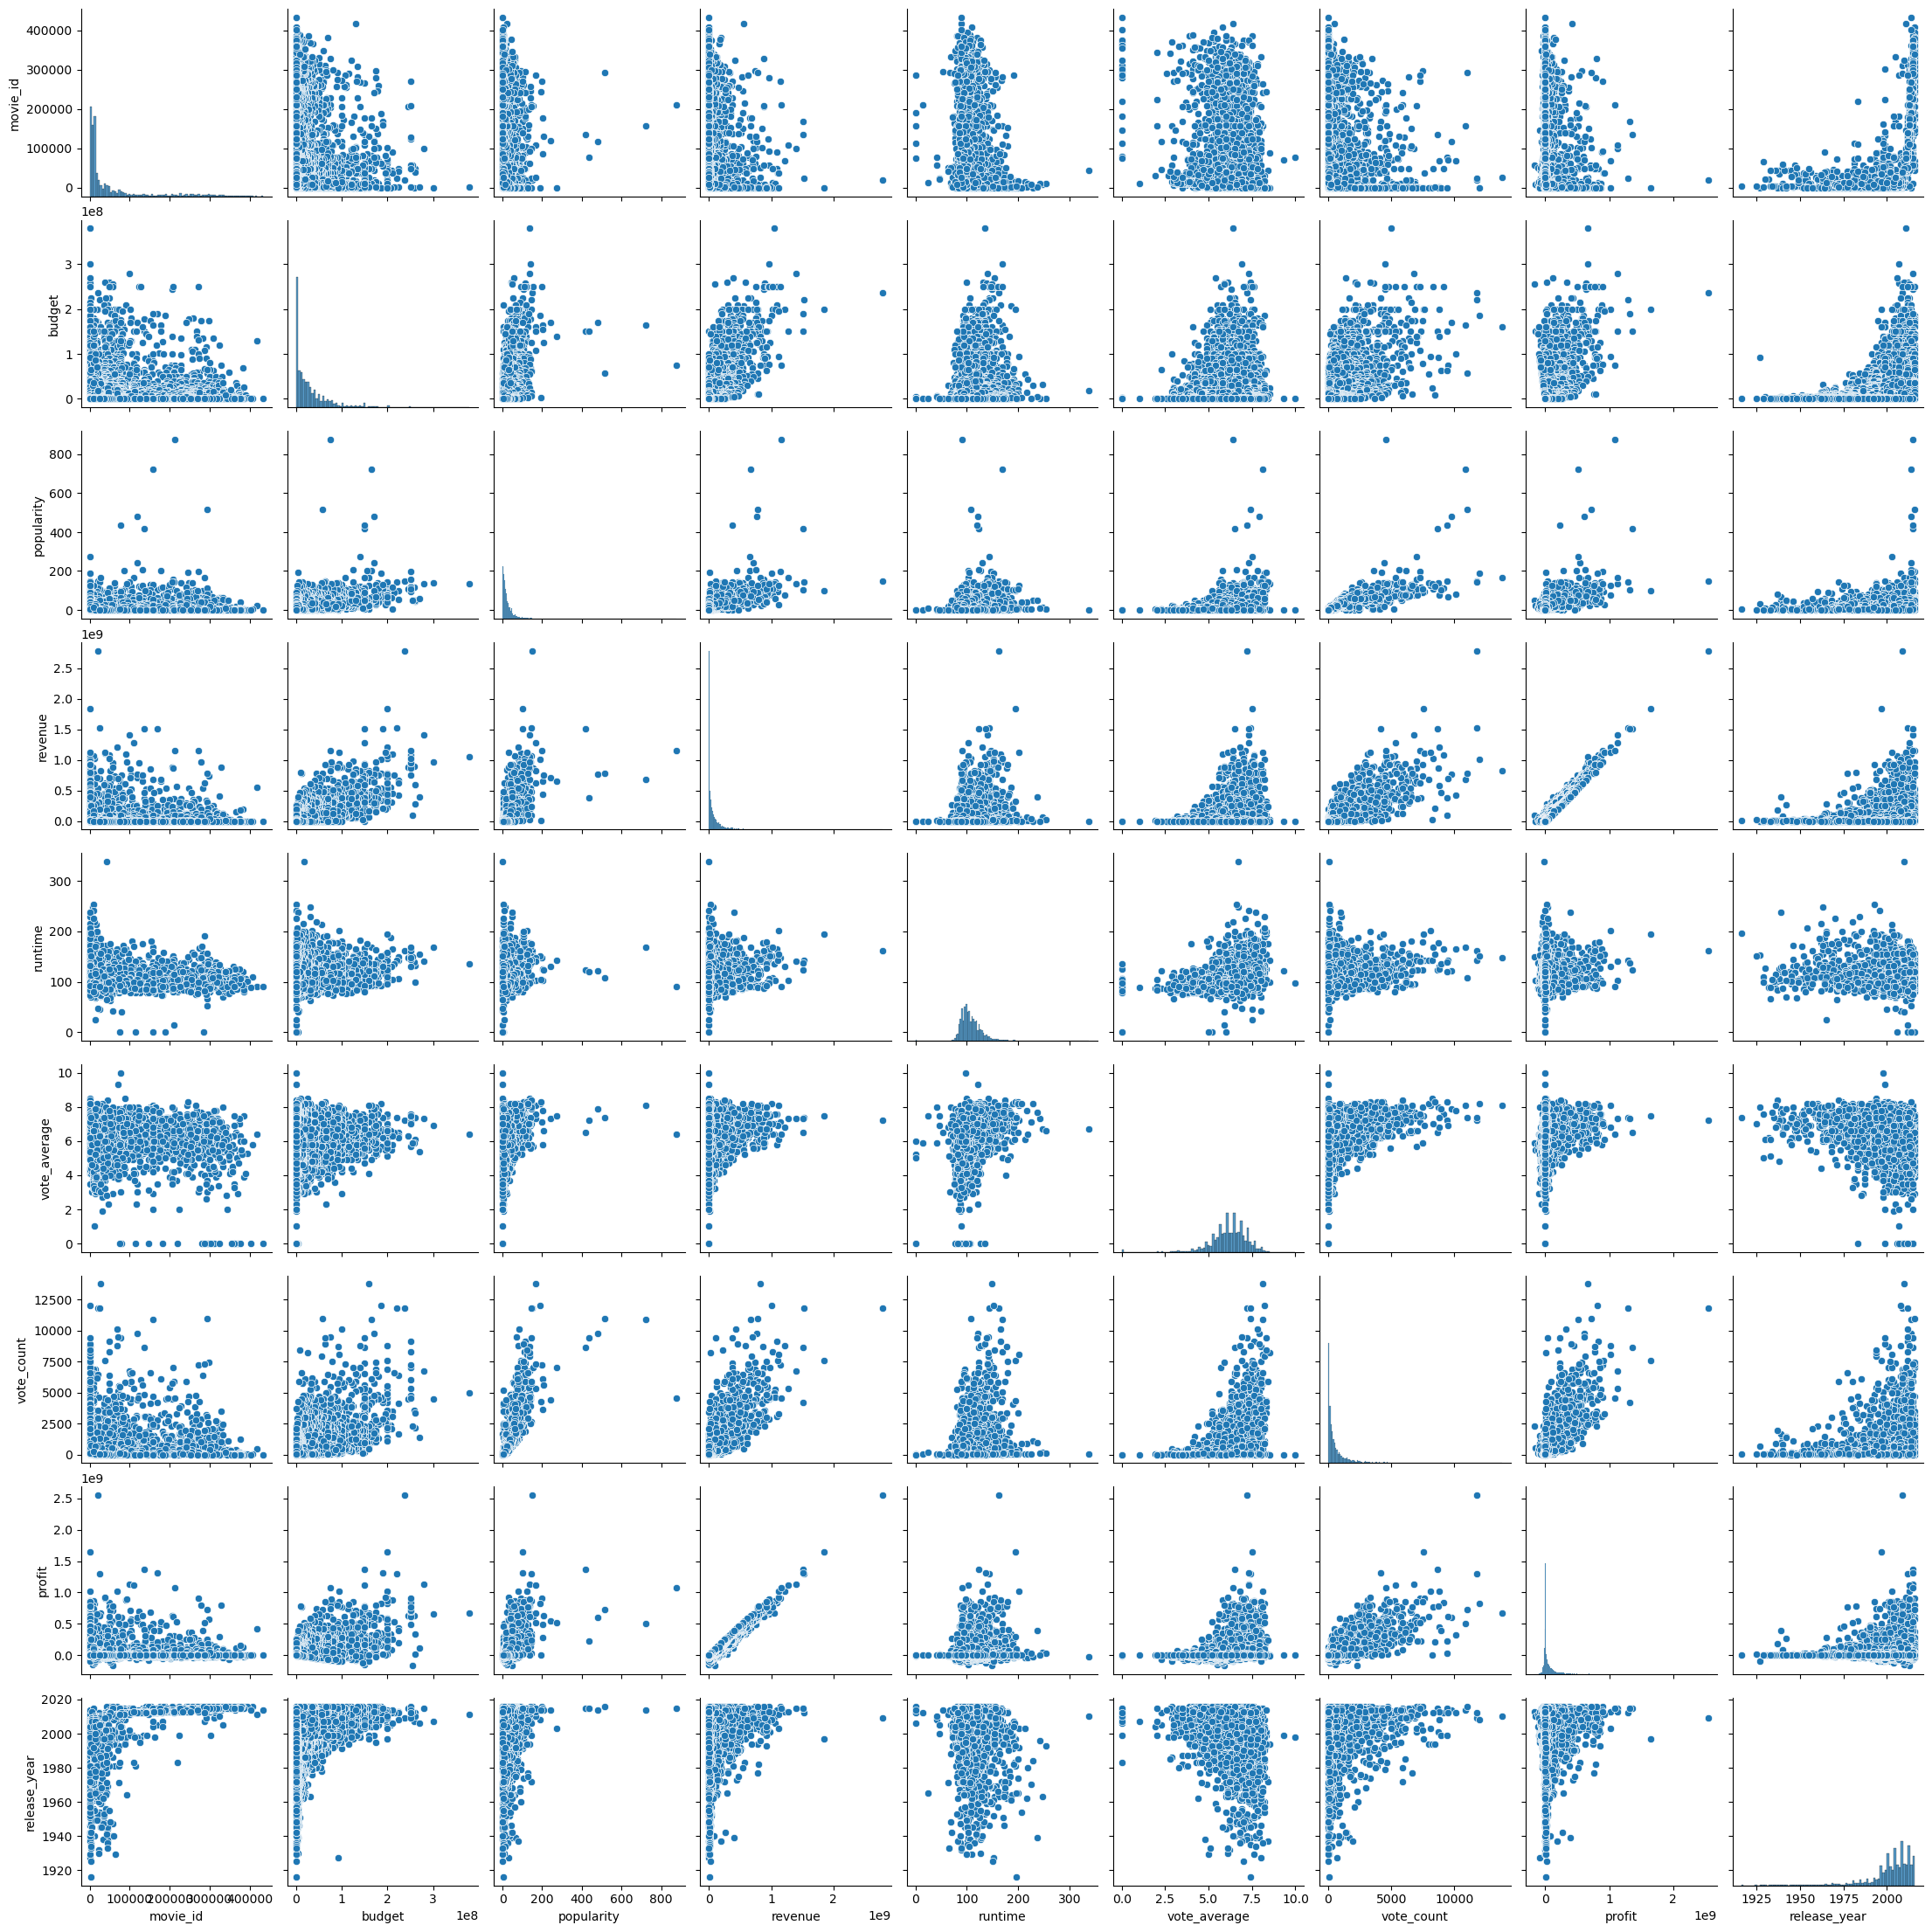

In [57]:
sns.pairplot(movie_df)

In [58]:
movie_df.shape

(4419, 20)

In [59]:
movie_df.describe()

movie_id        budget   popularity       revenue      runtime  \
count    4419.000000  4.419000e+03  4419.000000  4.419000e+03  4419.000000   
mean    52942.126273  3.144989e+07    23.219085  8.933932e+07   108.271390   
std     84762.180695  4.155871e+07    32.594522  1.679270e+08    20.920031   
min         5.000000  0.000000e+00     0.001586  0.000000e+00     0.000000   
25%      8478.500000  2.600000e+06     6.249772  1.050000e+01    95.000000   
50%     13483.000000  1.700000e+07    14.752587  2.583662e+07   105.000000   
75%     50646.500000  4.200000e+07    30.030585  1.016357e+08   118.000000   
max    433715.000000  3.800000e+08   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count        profit  release_year  
count   4419.000000   4419.000000  4.419000e+03   4419.000000  
mean       6.180810    748.689296  5.788942e+07   2002.181942  
std        1.019384   1270.337787  1.407760e+08     12.704067  
min        0.000000      0.000000 -1.657101e+08   1916.000000  
25%        5.700000     80.000000 -1.298568e+06   1999.000000  
50%        6.300000    285.000000  6.361217e+06   2005.000000  
75%        6.800000    826.000000  6.309199e+07   2010.000000  
max       10.000000  13752.000000  2.550965e+09   2016.000000

In [60]:
#Treating the data with zero values and outliers.

In [61]:
budget_25 = np.percentile(movie_df['budget'], 25)
movie_df.loc[movie_df['budget'] < budget_25, 'budget'] =budget_25

In [62]:
revenue_25 = np.percentile(movie_df['revenue'], 25)
movie_df.loc[movie_df['revenue'] < revenue_25, 'revenue'] =budget_25

In [63]:
movie_df.loc[movie_df['vote_average'] ==0 , 'vote_average'] = movie_df['vote_average'].mean()
movie_df.loc[movie_df['vote_count'] ==0 , 'vote_count'] = movie_df['vote_count'].mean()

In [64]:
movie_df.loc[movie_df['runtime'] ==0 , 'runtime'] = movie_df['runtime'].mean()

In [65]:
movie_df.to_csv('C:/Users/saran/OneDrive/Documents/TMDB_movies_capstone.csv')    ## exporting as csv file

In [66]:
movie_df.describe()  # rechecking

movie_id        budget   popularity       revenue      runtime  \
count    4419.000000  4.419000e+03  4419.000000  4.419000e+03  4419.000000   
mean    52942.126273  3.201290e+07    23.219085  8.998946e+07   108.393896   
std     84762.180695  4.114530e+07    32.594522  1.675844e+08    20.600139   
min         5.000000  2.600000e+06     0.001586  1.100000e+01    14.000000   
25%      8478.500000  2.600000e+06     6.249772  2.600000e+06    95.000000   
50%     13483.000000  1.700000e+07    14.752587  2.583662e+07   105.000000   
75%     50646.500000  4.200000e+07    30.030585  1.016357e+08   118.000000   
max    433715.000000  3.800000e+08   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count        profit  release_year  
count   4419.000000   4419.000000  4.419000e+03   4419.000000  
mean       6.210183    752.247222  5.788942e+07   2002.181942  
std        0.925577   1269.283675  1.407760e+08     12.704067  
min        1.000000      1.000000 -1.657101e+08   1916.000000  
25%        5.700000     82.000000 -1.298568e+06   1999.000000  
50%        6.300000    290.000000  6.361217e+06   2005.000000  
75%        6.800000    826.000000  6.309199e+07   2010.000000  
max       10.000000  13752.000000  2.550965e+09   2016.000000

##### Adding a new column rating based on mean vote_avg

In [67]:
M=movie_df['vote_average'].mean()


In [68]:
rating=[]
for i in movie_df.vote_average:
    if i >M:
        rating.append('Good')
    elif i <=M:
        rating.append('Poor')
movie_df['Rating']=rating

In [69]:
movie_df['Rating'].value_counts()

Good    2230
Poor    2189
Name: Rating, dtype: int64

In [70]:
cond1= movie_df['Rating']=='Good'
cond2=movie_df['Rating']=='Poor'
top_movie=movie_df[cond1]
low_movie=movie_df[cond2]

In [71]:
top_movie.head(3)

movie_id                                     title     budget  \
0     19995                                    Avatar  237000000   
1       285  Pirates of the Caribbean: At World's End  300000000   
2    206647                                   Spectre  245000000   

  original_language  popularity     production_companies  \
0                en  150.437577  Ingenious Film Partners   
1                en  139.082615     Walt Disney Pictures   
2                en  107.376788        Columbia Pictures   

       production_countries release_date     revenue  runtime  ...  \
0  United States of America   10-12-2009  2787965087    162.0  ...   
1  United States of America   19-05-2007   961000000    169.0  ...   
2            United Kingdom   26-10-2015   880674609    148.0  ...   

  vote_average  vote_count        director           cast 1           cast 2  \
0          7.2     11800.0   James Cameron  Sam Worthington      Zoe Saldana   
1          6.9      4500.0  Gore Verbinski      Johnny Depp    Orlando Bloom   
2          6.3      4466.0      Sam Mendes     Daniel Craig  Christoph Waltz   

  main genre  sub genre      profit  release_year  Rating  
0     Action  Adventure  2550965087          2009    Good  
1  Adventure    Fantasy   661000000          2007    Good  
2     Action  Adventure   635674609          2015    Good  

[3 rows x 21 columns]

In [72]:
low_movie.head(3)

movie_id                               title     budget original_language  \
4     49529                         John Carter  260000000                en   
5       559                        Spider-Man 3  258000000                en   
9    209112  Batman v Superman: Dawn of Justice  250000000                en   

   popularity  production_companies      production_countries release_date  \
4   43.926995  Walt Disney Pictures  United States of America   07-03-2012   
5  115.699814     Columbia Pictures  United States of America   01-05-2007   
9  155.790452             DC Comics  United States of America   23-03-2016   

     revenue  runtime  ... vote_average  vote_count        director  \
4  284139100    132.0  ...          6.1      2124.0  Andrew Stanton   
5  890871626    139.0  ...          5.9      3576.0       Sam Raimi   
9  873260194    151.0  ...          5.7      7004.0     Zack Snyder   

          cast 1         cast 2 main genre  sub genre     profit  \
4  Taylor Kitsch   Lynn Collins     Action  Adventure   24139100   
5  Tobey Maguire  Kirsten Dunst    Fantasy     Action  632871626   
9    Ben Affleck   Henry Cavill     Action  Adventure  623260194   

   release_year  Rating  
4          2012    Poor  
5          2007    Poor  
9          2016    Poor  

[3 rows x 21 columns]

In [73]:
top_rated=top_movie.copy()

In [74]:
low_rated=low_movie.copy()

In [75]:
obj= list(movie_df.select_dtypes(include=['object']).columns)  # creating a list of all columns with datatype as object
obj

['title',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'status',
 'director',
 'cast 1',
 'cast 2',
 'main genre',
 'sub genre',
 'Rating']

In [76]:
for i in obj:                   # using label encoder to non numerical columns to numerical columns
    top_movie[i]=LabelEncoder().fit_transform(top_movie[i])
top_movie.head()

movie_id  title     budget  original_language  popularity  \
0     19995    164  237000000                  6  150.437577   
1       285   1195  300000000                  6  139.082615   
2    206647   1450  245000000                  6  107.376788   
3     49026   1647  250000000                  6  112.312950   
6     38757   1526  260000000                  6   48.681969   

   production_companies  production_countries  release_date     revenue  \
0                   352                    47           587  2787965087   
1                   715                    47          1174   961000000   
2                   143                    46          1657   880674609   
3                   397                    47           968  1084939099   
6                   715                    47          1511   591794936   

   runtime  ...  vote_average  vote_count  director  cast 1  cast 2  \
0    162.0  ...           7.2     11800.0       430     957    1473   
1    169.0  ...           6.9      4500.0       371     551    1094   
2    148.0  ...           6.3      4466.0       971     235     258   
3    165.0  ...           7.6      9106.0       172     196     991   
6    100.0  ...           7.4      3330.0       133    1124     910   

   main genre  sub genre      profit  release_year  Rating  
0           0          1  2550965087          2009       0  
1           1          8   661000000          2007       0  
2           0          1   635674609          2015       0  
3           0          4   834939099          2012       0  
6           2          7   331794936          2010       0  

[5 rows x 21 columns]

In [77]:
s_df1=pd.DataFrame(normalize(StandardScaler().fit_transform(top_movie)),columns=top_movie.columns)    # sacling the data using scaler
s_df1.head()

movie_id     title    budget  original_language  popularity  \
0 -0.014751 -0.068547  0.218199          -0.009000    0.135362   
1 -0.061368  0.013348  0.655807          -0.020693    0.281909   
2  0.242702  0.059727  0.559650          -0.022217    0.214750   
3  0.005849  0.079217  0.478635          -0.018565    0.190890   
4 -0.010524  0.092258  0.754415          -0.027979    0.065483   

   production_companies  production_countries  release_date   revenue  \
0             -0.017146              0.025553     -0.029794  0.606176   
1              0.132834              0.058752      0.047513  0.441252   
2             -0.148806              0.054606      0.153504  0.428780   
3             -0.016210              0.052710      0.006099  0.453847   
4              0.179605              0.079439      0.154302  0.336350   

    runtime  ...  vote_average  vote_count  director    cast 1    cast 2  \
0  0.094542  ...      0.027145    0.309209 -0.022332  0.055772  0.080570   
1  0.249532  ...     -0.004770    0.226955 -0.069928 -0.006057  0.089922   
2  0.164338  ...     -0.149386    0.241246  0.127783 -0.118722 -0.129222   
3  0.207386  ...      0.136364    0.477595 -0.118960 -0.110781  0.057431   
4 -0.091162  ...      0.144951    0.201979 -0.195888  0.248072  0.059005   

   main genre  sub genre    profit  release_year  Rating  
0   -0.056968  -0.062141  0.660671      0.028374     0.0  
1   -0.106453  -0.025770  0.355869      0.050597     0.0  
2   -0.140629  -0.153400  0.365337      0.117207     0.0  
3   -0.117515  -0.083158  0.415315      0.078236     0.0  
4   -0.110766  -0.057464  0.207217      0.098110     0.0  

[5 rows x 21 columns]

In [78]:
cor_matrix1=s_df1.corr()    # calculating the correlation matrix
cor_matrix1

movie_id     title    budget  original_language  \
movie_id              1.000000  0.001381  0.018456           0.083807   
title                 0.001381  1.000000  0.039917           0.000265   
budget                0.018456  0.039917  1.000000          -0.033711   
original_language     0.083807  0.000265 -0.033711           1.000000   
popularity            0.137835 -0.018370  0.519635          -0.019683   
production_companies -0.013880  0.019127  0.087778          -0.057037   
production_countries -0.039135 -0.057288  0.019580          -0.196819   
release_date          0.001870 -0.013106  0.020213           0.012815   
revenue               0.026871  0.006696  0.708237          -0.019949   
runtime              -0.038099  0.011738  0.274044           0.057085   
status                0.025113 -0.000840  0.023700           0.024729   
vote_average          0.005880 -0.018714 -0.060331           0.083112   
vote_count            0.107876 -0.010233  0.539770          -0.016325   
director             -0.028971 -0.004202  0.000704          -0.014847   
cast 1               -0.029538 -0.002981  0.006735           0.020139   
cast 2               -0.000865  0.013844 -0.014448           0.030296   
main genre            0.076211  0.028768 -0.114940           0.017564   
sub genre             0.026045 -0.030651 -0.169722           0.008164   
profit                0.026626 -0.004049  0.542128          -0.013692   
release_year          0.388140 -0.001711  0.185702           0.033230   
Rating                     NaN       NaN       NaN                NaN   

                      popularity  production_companies  production_countries  \
movie_id                0.137835             -0.013880             -0.039135   
title                  -0.018370              0.019127             -0.057288   
budget                  0.519635              0.087778              0.019580   
original_language      -0.019683             -0.057037             -0.196819   
popularity              1.000000              0.087072              0.035879   
production_companies    0.087072              1.000000              0.052753   
production_countries    0.035879              0.052753              1.000000   
release_date            0.025685              0.021450              0.008774   
revenue                 0.659360              0.109977              0.052774   
runtime                 0.167026              0.049155             -0.055255   
status                  0.030066              0.001104             -0.018033   
vote_average            0.279960             -0.013467             -0.073928   
vote_count              0.846688              0.073042              0.026698   
director               -0.007900             -0.007490              0.003256   
cast 1                  0.000137              0.025380              0.007943   
cast 2                  0.016579              0.019688              0.001254   
main genre              0.008343             -0.044432             -0.007527   
sub genre              -0.117662             -0.059873             -0.002476   
profit                  0.628707              0.104642              0.057501   
release_year            0.114847             -0.115118             -0.116972   
Rating                       NaN                   NaN                   NaN   

                      release_date   revenue   runtime  ...  vote_average  \
movie_id                  0.001870  0.026871 -0.038099  ...      0.005880   
title                    -0.013106  0.006696  0.011738  ...     -0.018714   
budget                    0.020213  0.708237  0.274044  ...     -0.060331   
original_language         0.012815 -0.019949  0.057085  ...      0.083112   
popularity                0.025685  0.659360  0.167026  ...      0.279960   
production_companies      0.021450  0.109977  0.049155  ...     -0.013467   
production_countries      0.008774  0.052774 -0.055255  ...     -0.073928   
release_date              1.000000  0.

<AxesSubplot:>

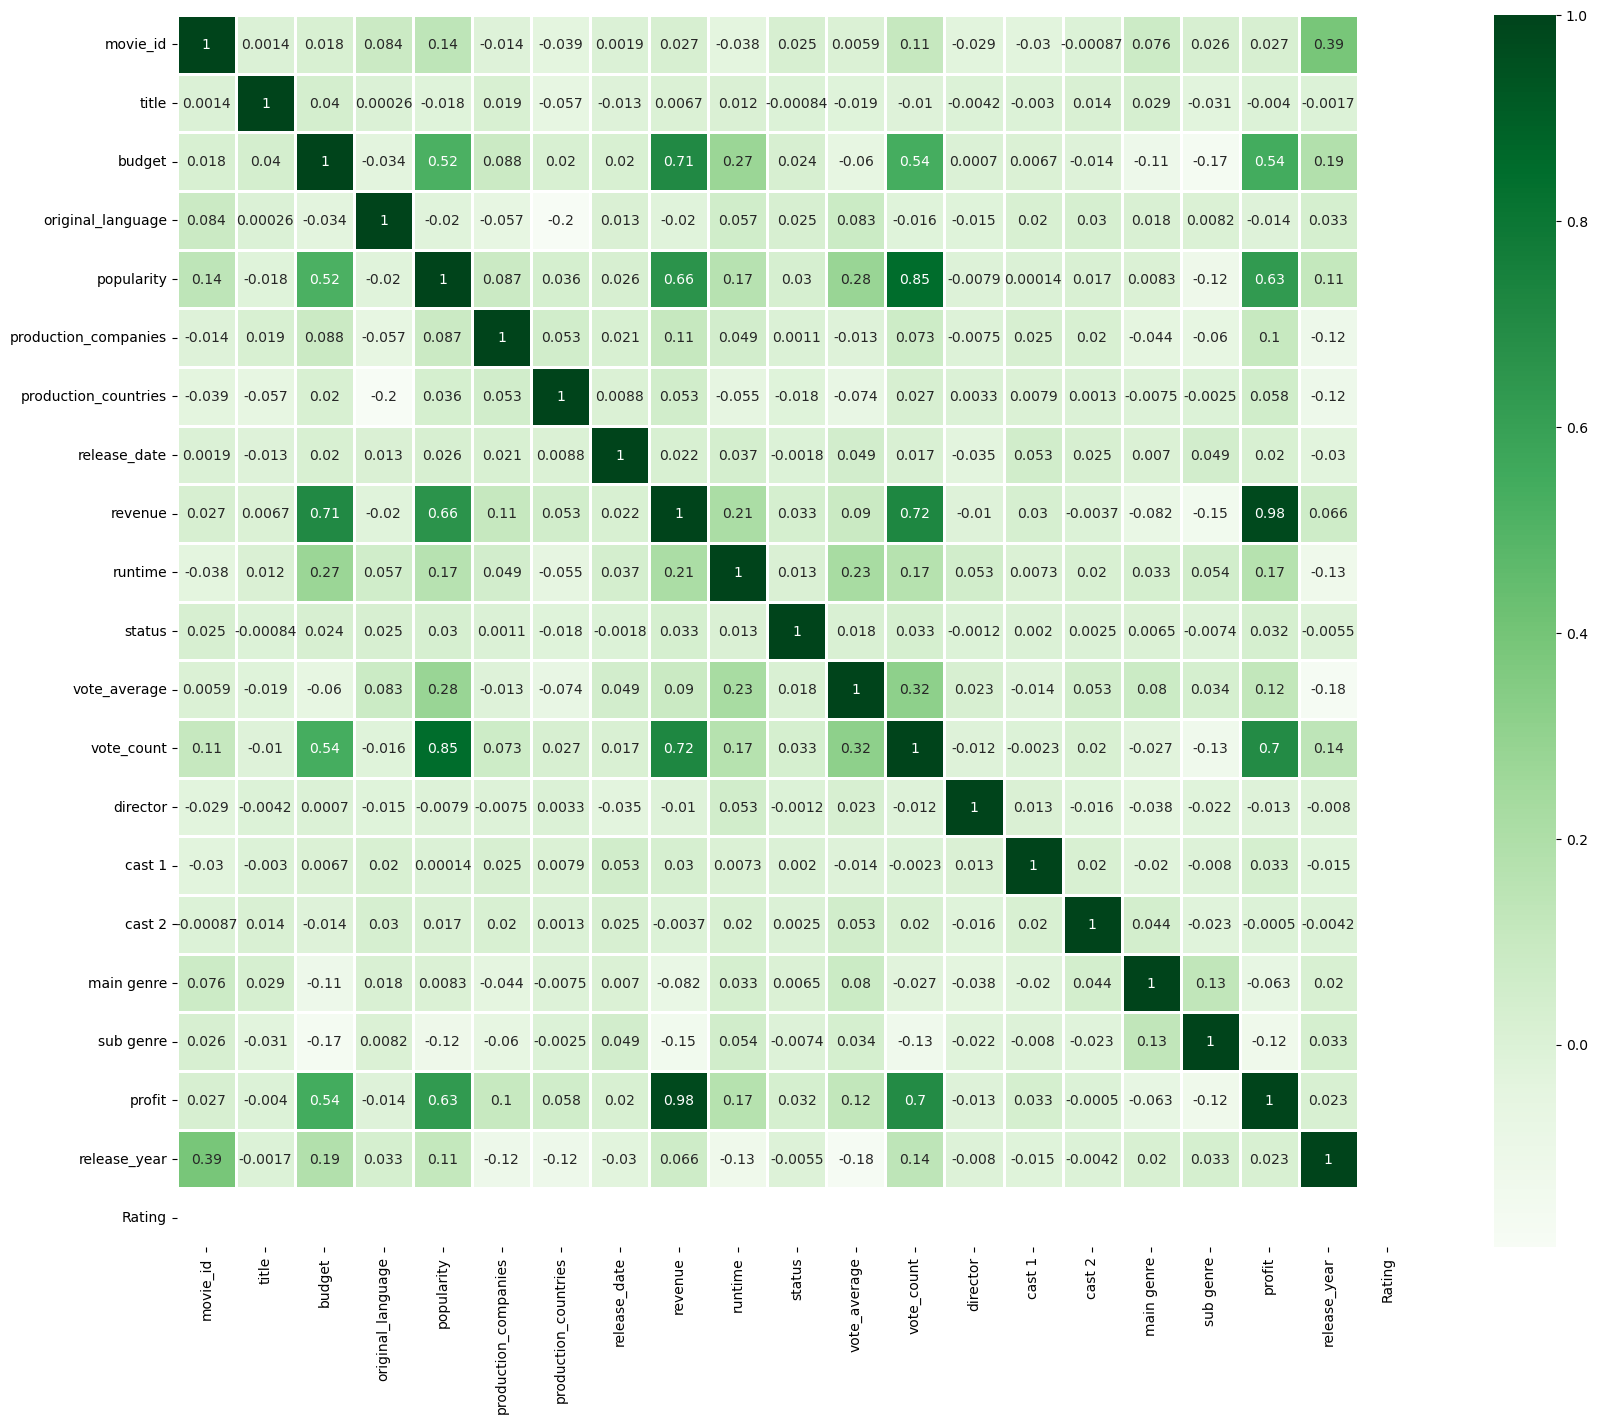

In [79]:
plt.figure(figsize=(20,16))
sns.heatmap(cor_matrix1,annot=True, linewidths=1,cmap='Greens',linecolor='white')

In [80]:
def correlation(df,threshold):
    col_corr=set()
    correlation_matrix=df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if(abs(correlation_matrix.iloc[i,j]))>threshold:
                col_name=correlation_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [81]:
selected_features=correlation(s_df1,0.7)
len(set(selected_features))

3

In [82]:
selected_features

{'profit', 'revenue', 'vote_count'}

In [83]:
## popularity , votecount

In [84]:
s_df1.drop(columns=['profit','release_date','movie_id','title','Rating','status'],inplace=True)

### Top rated movies

### PCA

In [85]:
pca=PCA()                                            #dimensionality reduction
t_df=pca.fit_transform(s_df1)
features=range(pca.n_components_)

([<matplotlib.axis.XTick at 0x2dc974fa6d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

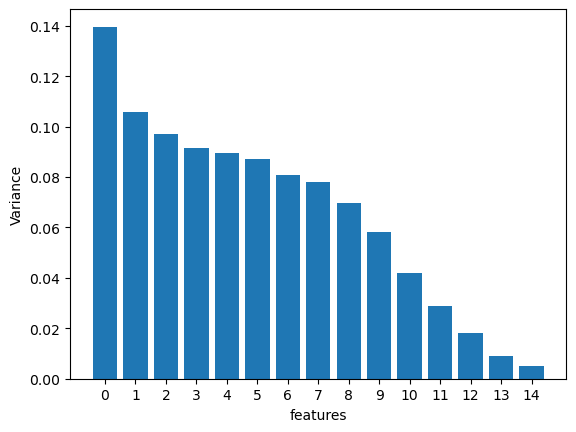

In [86]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel('features')
plt.ylabel('Variance')
plt.xticks(features)

In [87]:
pca2=PCA(n_components=2)                              # selecting number of prinicipal componets
t_df2=pca2.fit_transform(s_df1)
t_df2.shape

(2230, 2)

Text(0, 0.5, 'pca2')

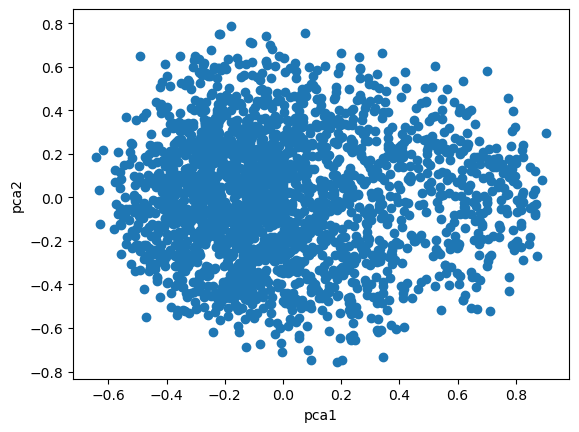

In [88]:
plt.scatter(t_df2[:,0],t_df2[:,1])   # plotting graph for PCA
plt.xlabel('pca1')
plt.ylabel('pca2')

## KMeans

In [89]:
for i in range(2,11):
    model=KMeans(n_clusters=i).fit(t_df2)
    score=silhouette_score(t_df2,model.labels_,metric='euclidean')
    print(f'k = {i}, score = {score}')

k = 2, score = 0.39587462103601995
k = 3, score = 0.3762502796244034
k = 4, score = 0.35118382776347395
k = 5, score = 0.3376796292594163
k = 6, score = 0.34374378684050866
k = 7, score = 0.3562954975637814
k = 8, score = 0.3423025996865916
k = 9, score = 0.3365510657677569
k = 10, score = 0.3364957195417831


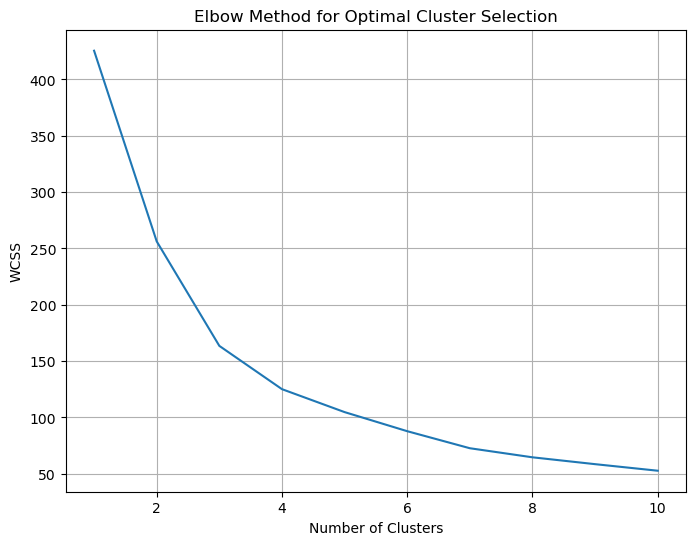

In [91]:
dist=[]                                                  # to select optimal value by elbow method
for i in range(1,11):
    model=KMeans(n_clusters=i).fit(t_df2)
    dist.append(model.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),dist) 
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.grid()
plt.show()

In [98]:
kmodel1=KMeans(n_clusters=3).fit(t_df2)            # fitting the model 
kmodel1.cluster_centers_

array([[-0.14545791, -0.2436503 ],
       [ 0.48548993,  0.01213599],
       [-0.14839328,  0.24661566]])

In [99]:
klabels1=kmodel1.labels_               # cluster labels
klabels1

array([1, 1, 1, ..., 2, 2, 2])

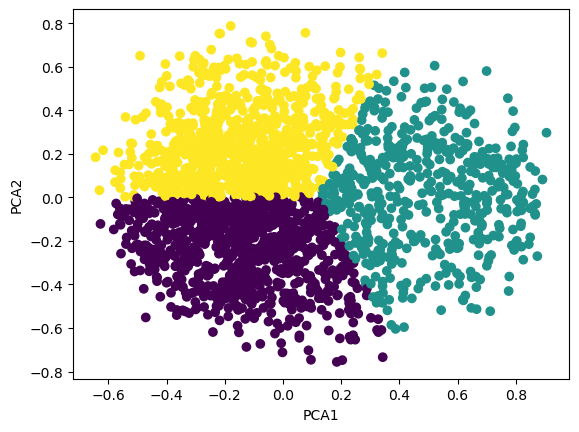

In [100]:
plt.scatter(t_df2[:,0],t_df2[:,1],c=kmodel1.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### Agglomerative hierarcheal

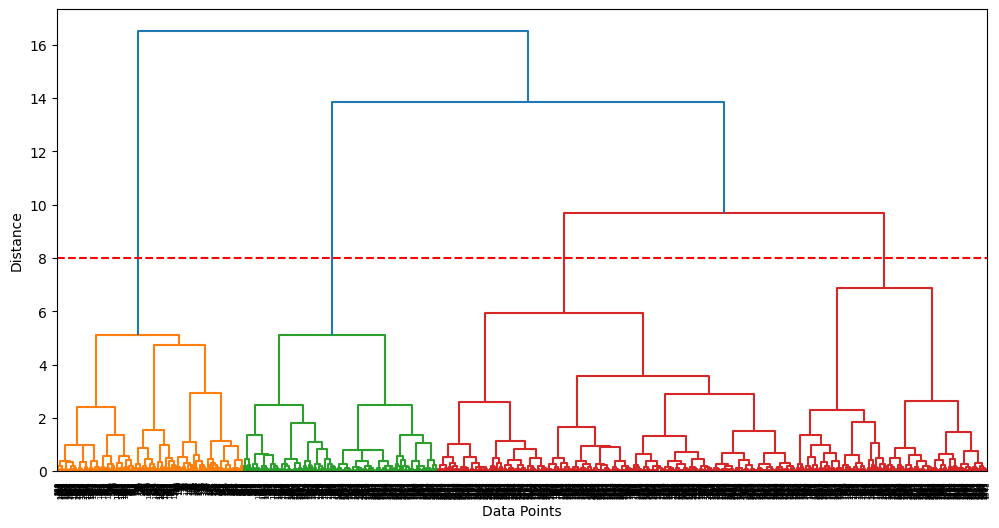

In [87]:
linkage_data= linkage(t_df2,method='ward',metric='euclidean')
plt.figure(figsize=(12,6))
dendrogram(linkage_data)
plt.axhline(y=8,color='red',linestyle='--')             #finding optimal cluster values using dendrogram
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [102]:
h_model1= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hlabels1=h_model1.fit_predict(t_df2)                #fitting the model

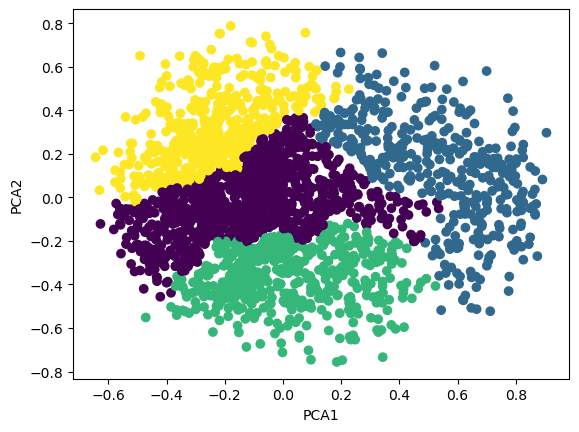

In [103]:
plt.scatter(t_df2[:,0],t_df2[:,1],c=hlabels1)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()    

### DBSCAN

In [104]:
neighbours=NearestNeighbors(n_neighbors=5)       
neigh_fit=neighbours.fit(t_df2)
distance, index=neigh_fit.kneighbors(t_df2)

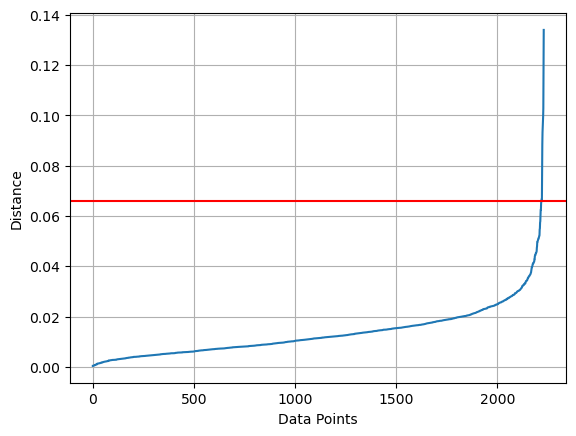

In [91]:
distances=np.sort(distance,axis=0)            #finding optimal epsilon value
distances=distances[:,1]
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid()
plt.axhline(y=0.066,color="r")

In [105]:
for i in range(2,21):                                                   #min_samples based on score
    model = DBSCAN(eps=0.066, min_samples=i)
    model.fit(t_df2)
    score = silhouette_score(t_df2, model.labels_)
    print(f'min_samples = {i}, score = {score}')

min_samples = 2, score = -0.05810989911327419
min_samples = 3, score = 0.2120135036676665
min_samples = 4, score = 0.3606716657980417
min_samples = 5, score = 0.35934167874699324
min_samples = 6, score = 0.1988398586358398
min_samples = 7, score = 0.194161257419619
min_samples = 8, score = 0.19347473200934662
min_samples = 9, score = 0.20186417239220414
min_samples = 10, score = 0.20264722843345984
min_samples = 11, score = -0.003497473305009116
min_samples = 12, score = 0.3035748329704248
min_samples = 13, score = 0.29650242522324494
min_samples = 14, score = 0.006599019811845984
min_samples = 15, score = -0.041994724715782125
min_samples = 16, score = 0.04864918695130549
min_samples = 17, score = 0.04759646348471314
min_samples = 18, score = 0.07177779479933306
min_samples = 19, score = 0.031975018359684027
min_samples = 20, score = 0.13317799809957137


In [106]:
eps=0.066
for i in range(1,16):
    db=DBSCAN(eps=eps,min_samples=i)
    db.fit(t_df2)
    labels=db.labels_

    new_labels=labels+2
    y=np.bincount(new_labels)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print("min_sample:",i,"cluster:",cluster)

min_sample: 1 cluster: [(2, 2206), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 3), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1)]
min_sample: 2 cluster: [(1, 13), (2, 2206), (3, 2), (4, 2), (5, 2), (6, 3), (7, 2)]
min_sample: 3 cluster: [(1, 21), (2, 2206), (3, 3)]
min_sample: 4 cluster: [(1, 27), (2, 2203)]
min_sample: 5 cluster: [(1, 28), (2, 2202)]
min_sample: 6 cluster: [(1, 34), (2, 2189), (3, 7)]
min_sample: 7 cluster: [(1, 56), (2, 2167), (3, 7)]
min_sample: 8 cluster: [(1, 75), (2, 2143), (3, 12)]
min_sample: 9 cluster: [(1, 97), (2, 2124), (3, 9)]
min_sample: 10 cluster: [(1, 135), (2, 2086), (3, 9)]
min_sample: 11 cluster: [(1, 154), (2, 2057), (3, 8), (4, 11)]
min_sample: 12 cluster: [(1, 187), (2, 2043)]
min_sample: 13 cluster: [(1, 205), (2, 2025)]
min_sample: 14 cluster: [(1, 235), (2, 1973), (3, 10), (4, 12)]
min_sample: 15 cluster: [(1, 266), (2, 1924), (3, 27), (4, 13)]


In [107]:
db=DBSCAN(eps=eps,min_samples=12)
db.fit(t_df2)
dlabels=db.labels_

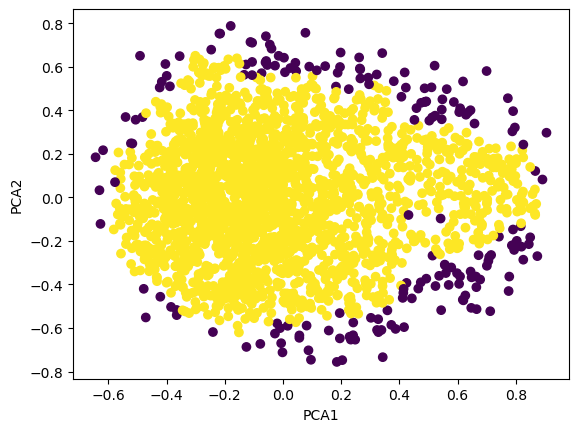

In [108]:
plt.scatter(t_df2[:,0],t_df2[:,1],c=dlabels,)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [109]:
Kscore=silhouette_score(t_df2,kmodel1.labels_,metric='euclidean')
AHscore=silhouette_score(t_df2,h_model1.labels_,metric='euclidean')
DBscore=silhouette_score(t_df2,db.labels_,metric='euclidean')
print('Scores for models')
print()
print('Kmean      : ',Kscore)
print('Hirachical : ',AHscore)
print('DBSCAN     : ',DBscore)

Scores for models

Kmean      :  0.3760186605065304
Hirachical :  0.2842579903423937
DBSCAN     :  0.3035748329704248


In [110]:
top_rated['clusters'] = klabels1
top_rated.head()

movie_id                                     title     budget  \
0     19995                                    Avatar  237000000   
1       285  Pirates of the Caribbean: At World's End  300000000   
2    206647                                   Spectre  245000000   
3     49026                     The Dark Knight Rises  250000000   
6     38757                                   Tangled  260000000   

  original_language  popularity     production_companies  \
0                en  150.437577  Ingenious Film Partners   
1                en  139.082615     Walt Disney Pictures   
2                en  107.376788        Columbia Pictures   
3                en  112.312950       Legendary Pictures   
6                en   48.681969     Walt Disney Pictures   

       production_countries release_date     revenue  runtime  ... vote_count  \
0  United States of America   10-12-2009  2787965087    162.0  ...    11800.0   
1  United States of America   19-05-2007   961000000    169.0  ...     4500.0   
2            United Kingdom   26-10-2015   880674609    148.0  ...     4466.0   
3  United States of America   16-07-2012  1084939099    165.0  ...     9106.0   
6  United States of America   24-11-2010   591794936    100.0  ...     3330.0   

            director           cast 1           cast 2 main genre  sub genre  \
0      James Cameron  Sam Worthington      Zoe Saldana     Action  Adventure   
1     Gore Verbinski      Johnny Depp    Orlando Bloom  Adventure    Fantasy   
2         Sam Mendes     Daniel Craig  Christoph Waltz     Action  Adventure   
3  Christopher Nolan   Christian Bale    Michael Caine     Action      Crime   
6       Byron Howard     Zachary Levi      Mandy Moore  Animation     Family   

       profit release_year  Rating  clusters  
0  2550965087         2009    Good         1  
1   661000000         2007    Good         1  
2   635674609         2015    Good         1  
3   834939099         2012    Good         1  
6   331794936         2010    Good         1  

[5 rows x 22 columns]

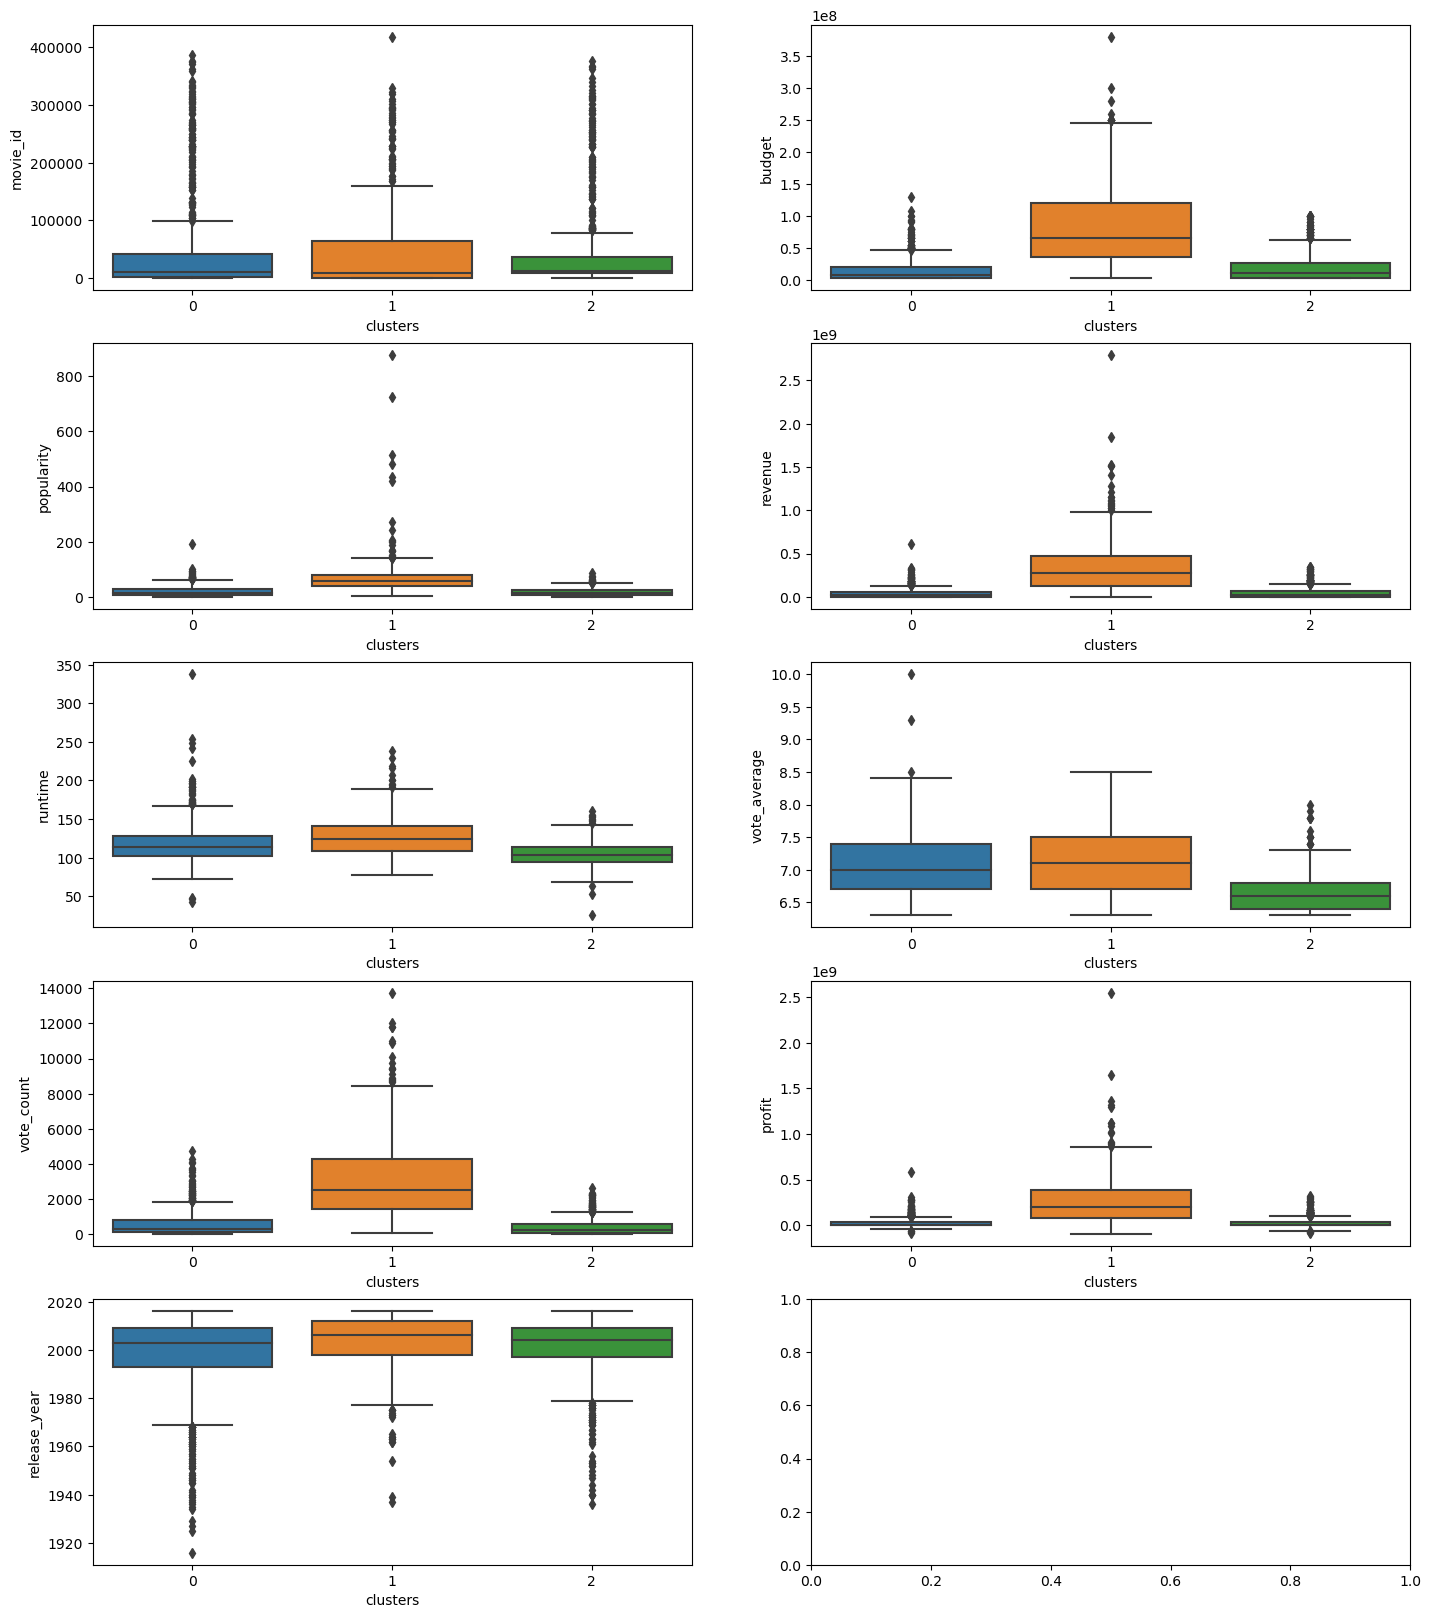

In [111]:
fig,ax=plt.subplots(5,2,figsize=(17,20))
ax=ax.ravel()
for i,j in zip(continuous,range(len(continuous))):
    sns.boxplot(data=top_rated,y=i,x='clusters',ax=ax[j])

In [112]:
cat=['main genre','sub genre']

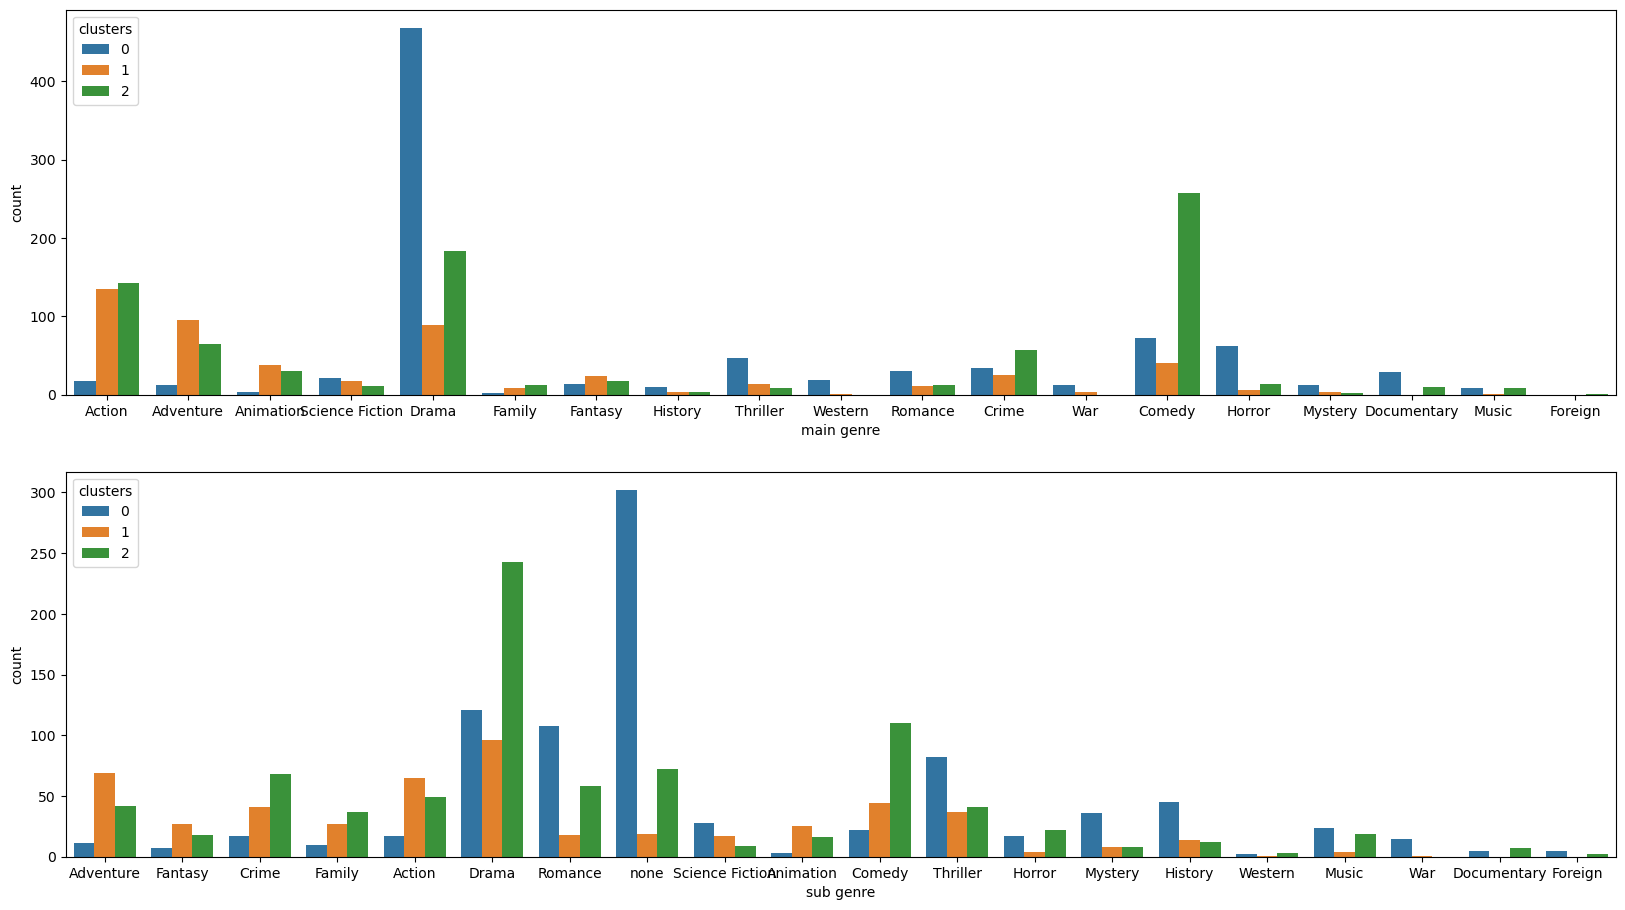

In [113]:
fig,ax=plt.subplots(2,1,figsize=(20,11))
ax=ax.ravel()
for i,j in zip(cat,range(len(categorical))):
    sns.countplot(data=top_rated,x=i,hue='clusters',ax=ax[j])

In [114]:
top_rated.head()

movie_id                                     title     budget  \
0     19995                                    Avatar  237000000   
1       285  Pirates of the Caribbean: At World's End  300000000   
2    206647                                   Spectre  245000000   
3     49026                     The Dark Knight Rises  250000000   
6     38757                                   Tangled  260000000   

  original_language  popularity     production_companies  \
0                en  150.437577  Ingenious Film Partners   
1                en  139.082615     Walt Disney Pictures   
2                en  107.376788        Columbia Pictures   
3                en  112.312950       Legendary Pictures   
6                en   48.681969     Walt Disney Pictures   

       production_countries release_date     revenue  runtime  ... vote_count  \
0  United States of America   10-12-2009  2787965087    162.0  ...    11800.0   
1  United States of America   19-05-2007   961000000    169.0  ...     4500.0   
2            United Kingdom   26-10-2015   880674609    148.0  ...     4466.0   
3  United States of America   16-07-2012  1084939099    165.0  ...     9106.0   
6  United States of America   24-11-2010   591794936    100.0  ...     3330.0   

            director           cast 1           cast 2 main genre  sub genre  \
0      James Cameron  Sam Worthington      Zoe Saldana     Action  Adventure   
1     Gore Verbinski      Johnny Depp    Orlando Bloom  Adventure    Fantasy   
2         Sam Mendes     Daniel Craig  Christoph Waltz     Action  Adventure   
3  Christopher Nolan   Christian Bale    Michael Caine     Action      Crime   
6       Byron Howard     Zachary Levi      Mandy Moore  Animation     Family   

       profit release_year  Rating  clusters  
0  2550965087         2009    Good         1  
1   661000000         2007    Good         1  
2   635674609         2015    Good         1  
3   834939099         2012    Good         1  
6   331794936         2010    Good         1  

[5 rows x 22 columns]

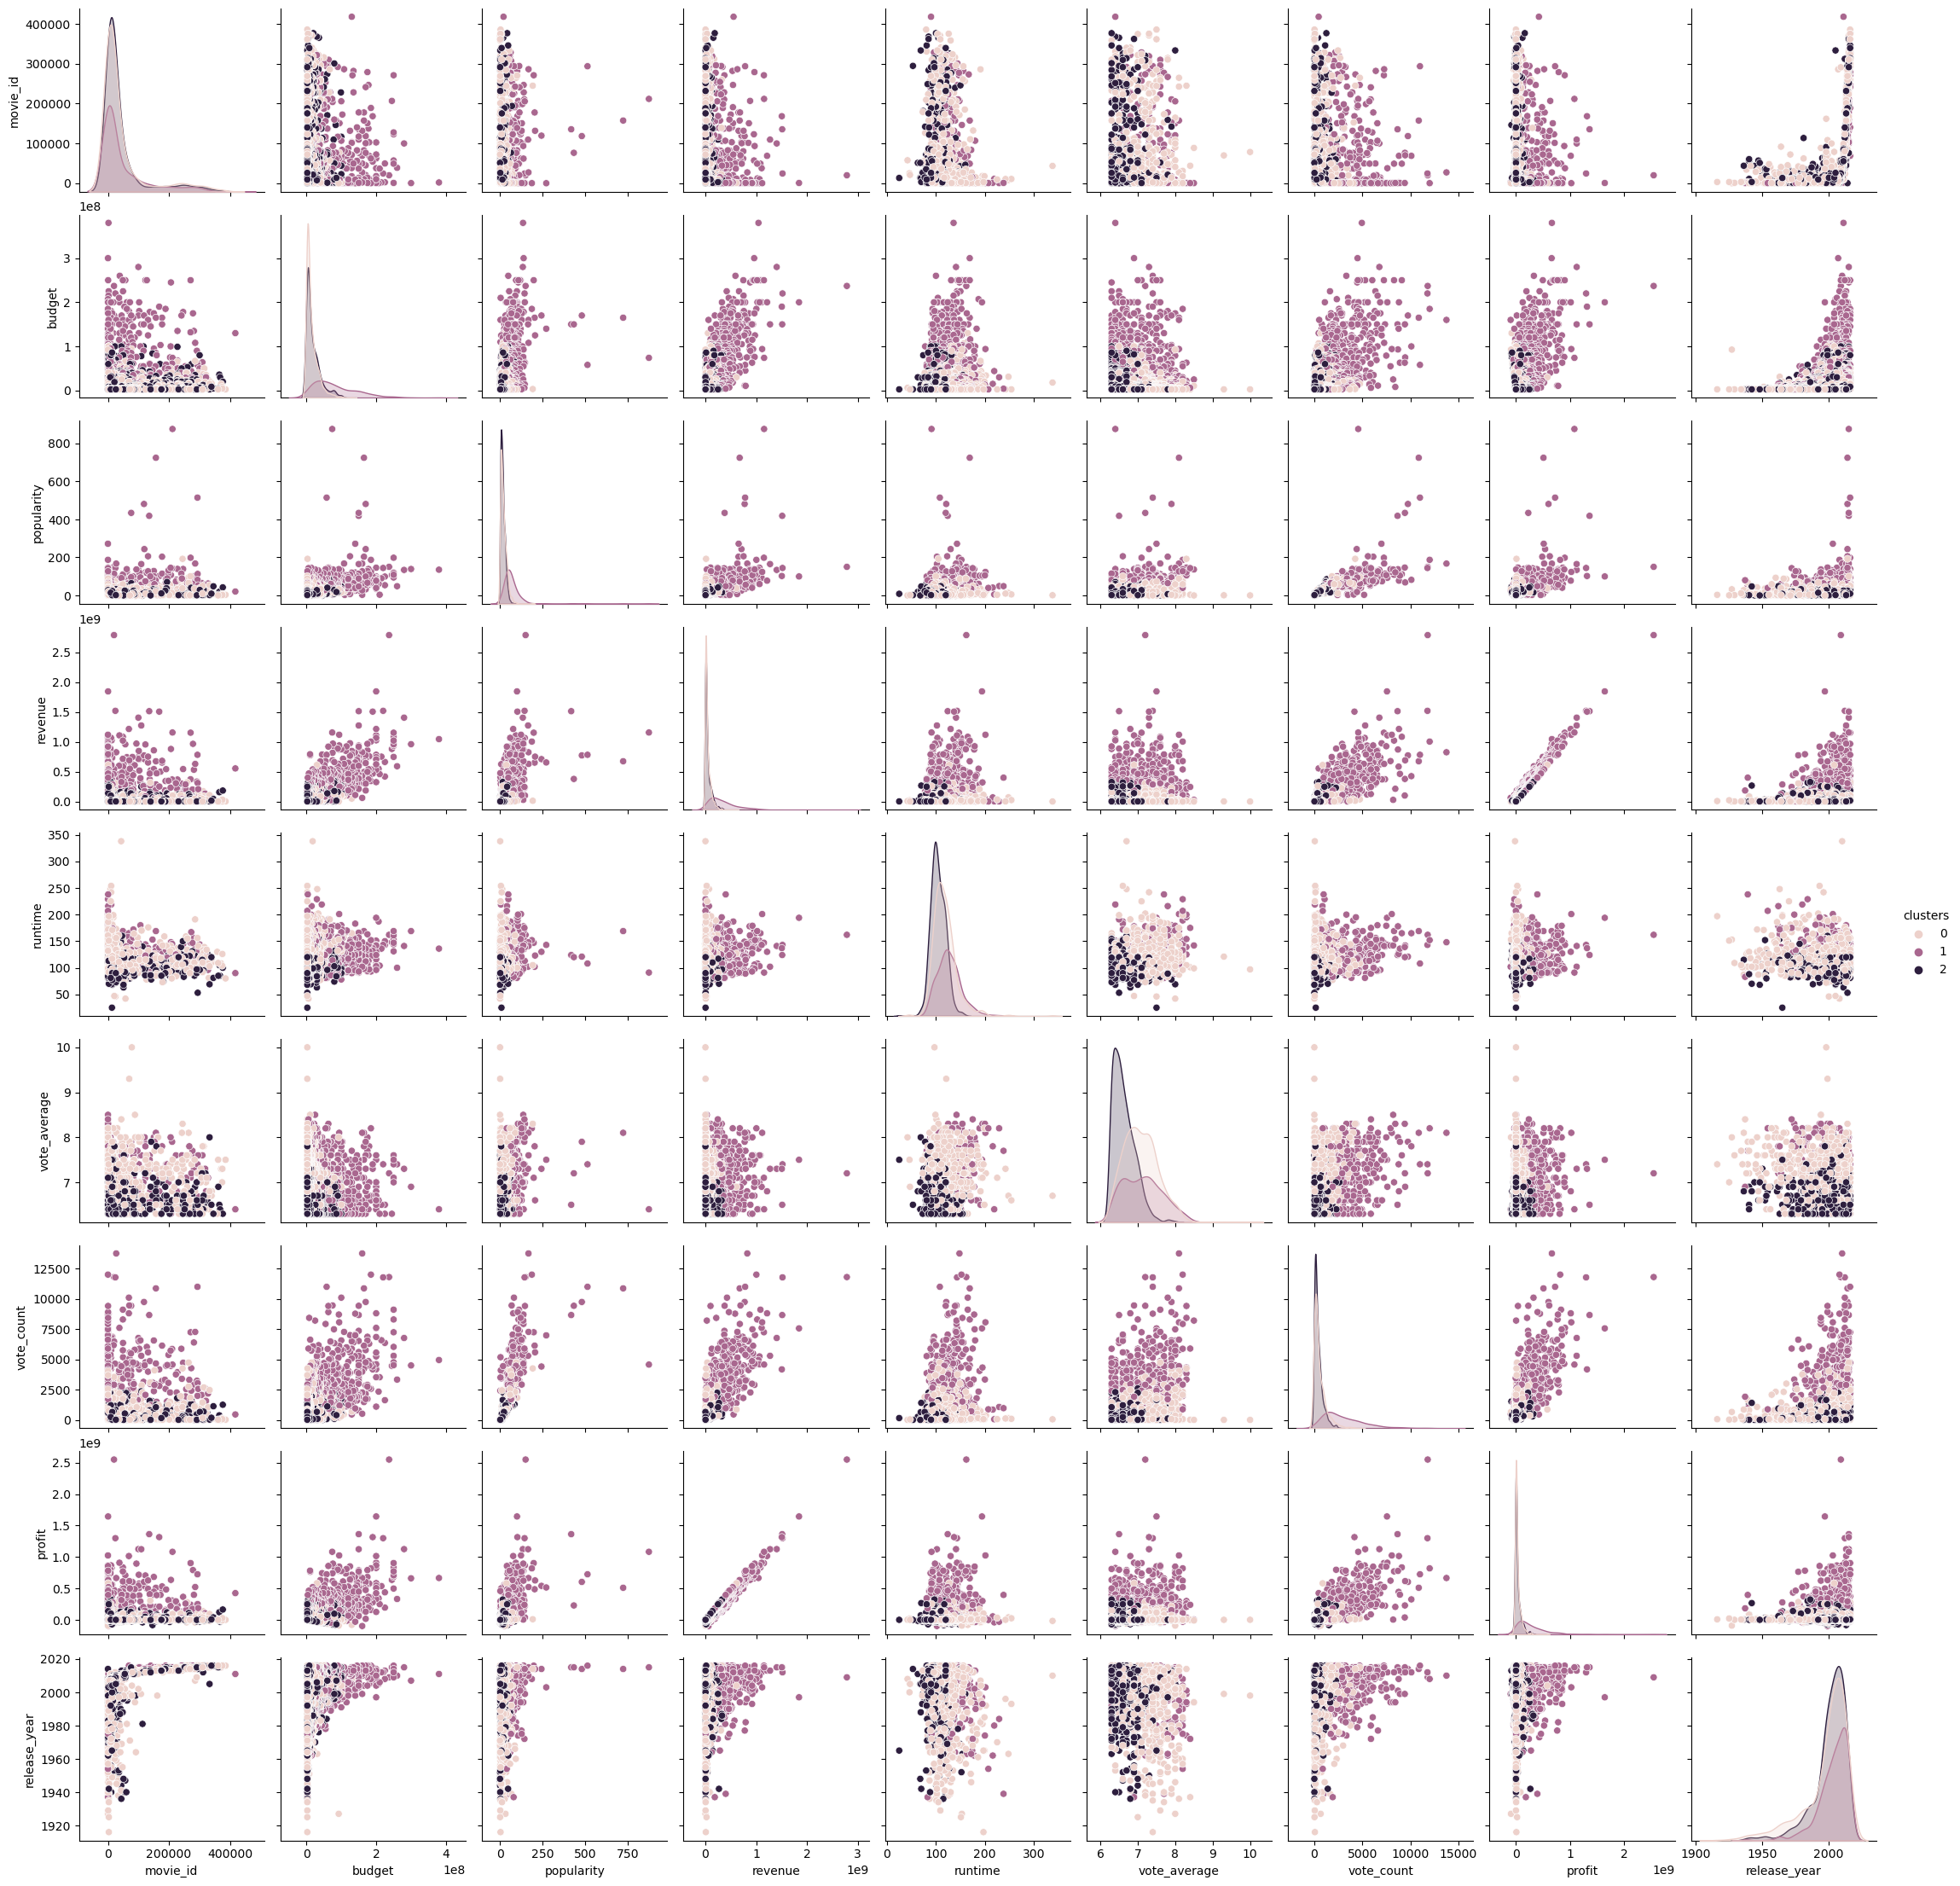

In [115]:
sns.pairplot(top_rated,hue='clusters')

In [116]:
top_rated.describe()

movie_id        budget   popularity       revenue      runtime  \
count    2230.000000  2.230000e+03  2230.000000  2.230000e+03  2230.000000   
mean    44345.231839  3.190350e+07    29.929850  1.146577e+08   114.677700   
std     76655.334811  4.364687e+07    41.339354  2.047843e+08    23.242838   
min         5.000000  2.600000e+06     0.008453  1.100000e+01    25.000000   
25%      2288.250000  3.000000e+06     8.460948  3.002799e+06    99.000000   
50%     11198.000000  1.500000e+07    19.710341  3.462807e+07   111.000000   
75%     43937.250000  4.000000e+07    39.321078  1.236687e+08   126.000000   
max    417859.000000  3.800000e+08   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count        profit  release_year     clusters  
count   2230.000000   2230.000000  2.230000e+03   2230.000000  2230.000000  
mean       6.921300   1076.931390  8.278294e+07   2000.089238     0.981614  
std        0.476744   1610.325174  1.734759e+08     14.582745     0.876452  
min        6.300000      1.000000 -9.830110e+07   1916.000000     0.000000  
25%        6.500000    130.250000  0.000000e+00   1996.000000     0.000000  
50%        6.800000    449.500000  1.736370e+07   2004.000000     1.000000  
75%        7.200000   1263.750000  8.645600e+07   2010.000000     2.000000  
max       10.000000  13752.000000  2.550965e+09   2016.000000     2.000000

In [117]:
cond1=top_rated['clusters']==0
top1=top_rated[cond1]

In [118]:
top1.describe()

movie_id        budget  popularity       revenue     runtime  \
count     877.000000  8.770000e+02  877.000000  8.770000e+02  877.000000   
mean    44966.911060  1.502327e+07   19.786977  4.070598e+07  117.576136   
std     79687.645486  1.741671e+07   17.814617  5.788560e+07   24.502145   
min        16.000000  2.600000e+06    0.008453  1.100000e+01   42.000000   
25%      2252.000000  2.600000e+06    6.799314  2.600000e+06  102.000000   
50%     11208.000000  7.700000e+06   14.988746  1.770916e+07  114.000000   
75%     41110.000000  2.000000e+07   28.840997  5.467423e+07  128.000000   
max    385736.000000  1.300000e+08  192.528841  6.118994e+08  338.000000   

       vote_average   vote_count        profit  release_year  clusters  
count    877.000000   877.000000  8.770000e+02    877.000000     877.0  
mean       7.081072   552.309008  2.574947e+07   1997.702395       0.0  
std        0.457267   687.053197  5.232269e+07     17.210731       0.0  
min        6.300000     1.000000 -9.196958e+07   1916.000000       0.0  
25%        6.700000    90.000000 -4.600000e+04   1993.000000       0.0  
50%        7.000000   285.000000  6.200000e+06   2003.000000       0.0  
75%        7.400000   796.000000  3.747817e+07   2009.000000       0.0  
max       10.000000  4737.000000  5.818994e+08   2016.000000       0.0

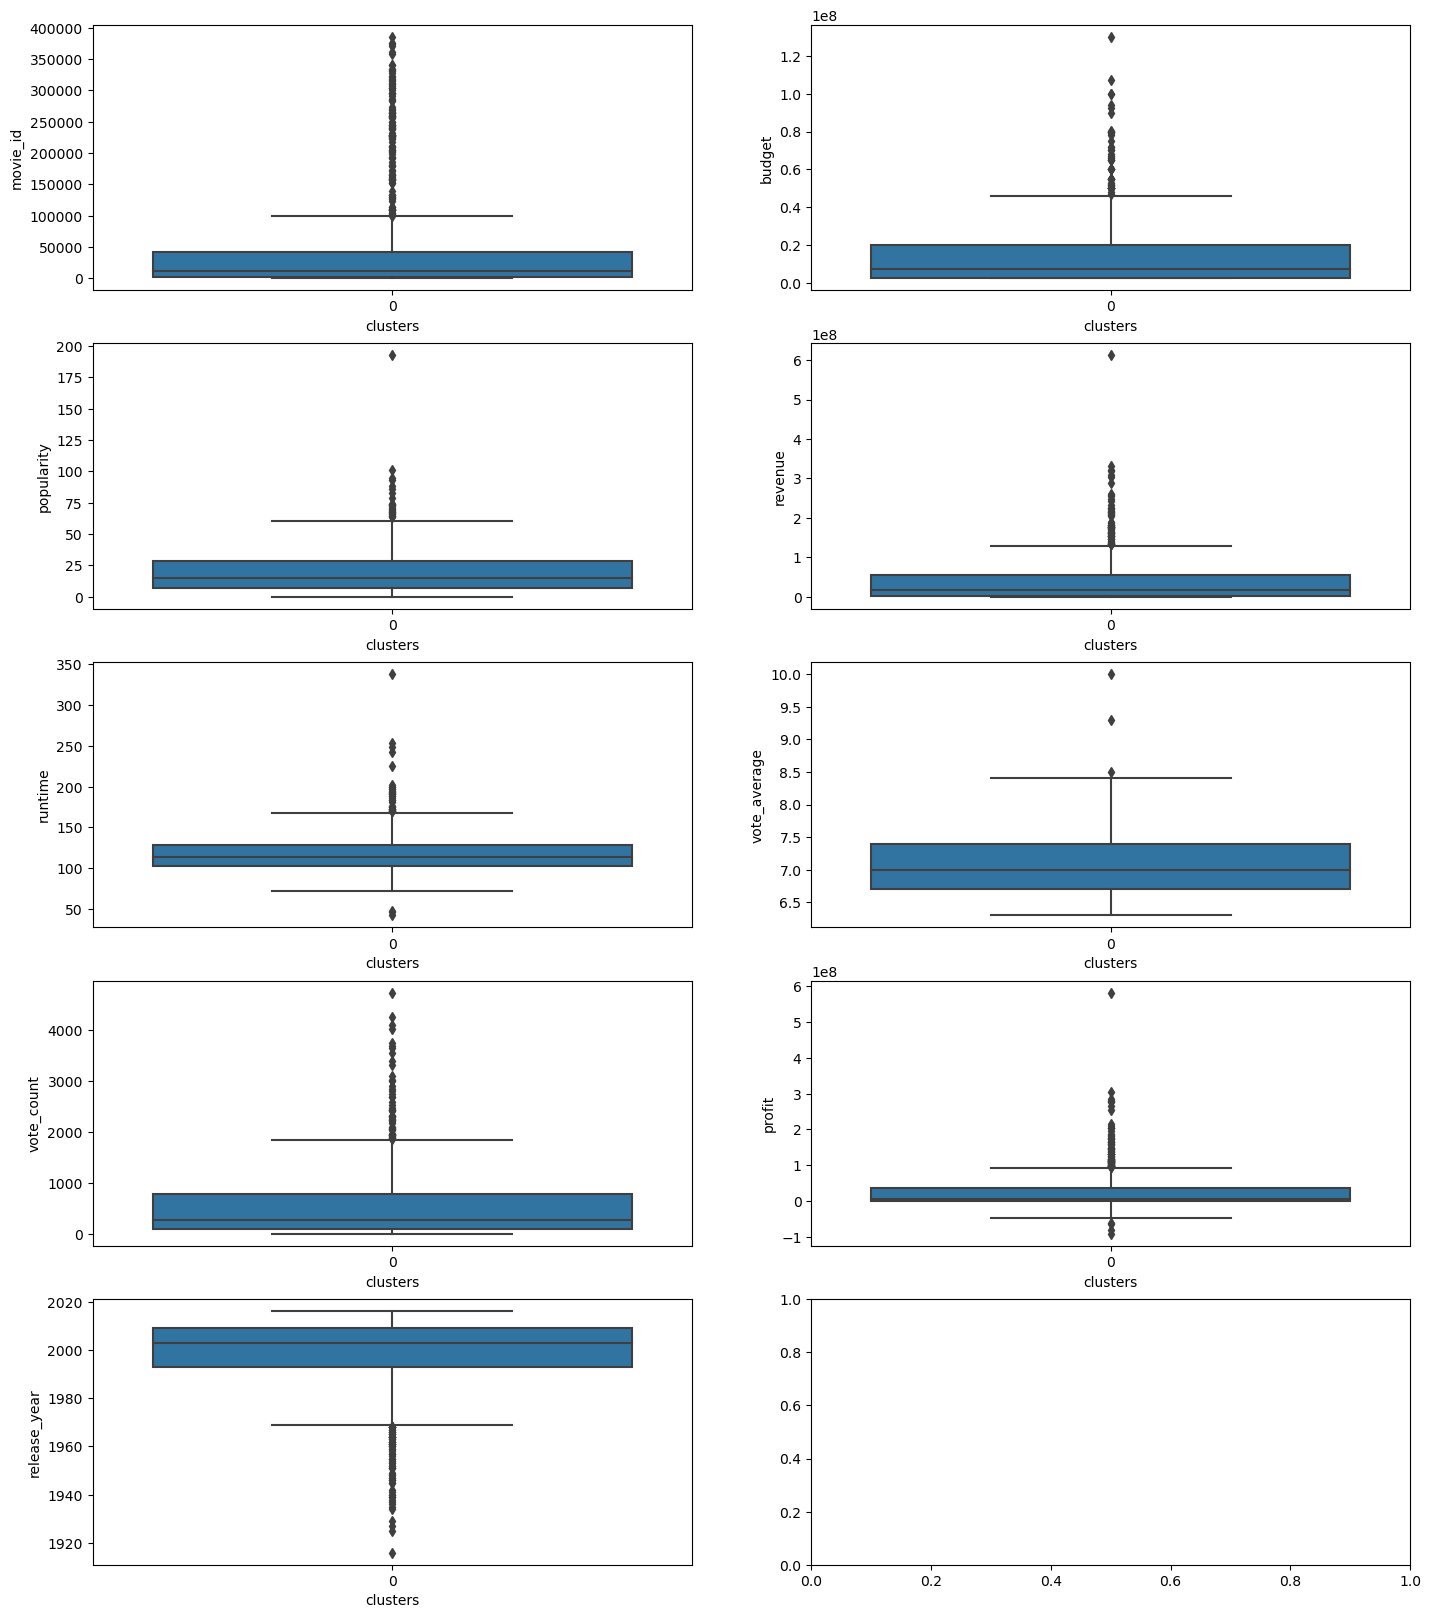

In [119]:
fig,ax=plt.subplots(5,2,figsize=(17,20))
ax=ax.ravel()
for i,j in zip(continuous,range(len(continuous))):
    sns.boxplot(data=top1,y=i,x='clusters',ax=ax[j])

In [120]:
cond2=top_rated['clusters']==1
top2=top_rated[cond2]

In [121]:
top1.describe()

movie_id        budget  popularity       revenue     runtime  \
count     877.000000  8.770000e+02  877.000000  8.770000e+02  877.000000   
mean    44966.911060  1.502327e+07   19.786977  4.070598e+07  117.576136   
std     79687.645486  1.741671e+07   17.814617  5.788560e+07   24.502145   
min        16.000000  2.600000e+06    0.008453  1.100000e+01   42.000000   
25%      2252.000000  2.600000e+06    6.799314  2.600000e+06  102.000000   
50%     11208.000000  7.700000e+06   14.988746  1.770916e+07  114.000000   
75%     41110.000000  2.000000e+07   28.840997  5.467423e+07  128.000000   
max    385736.000000  1.300000e+08  192.528841  6.118994e+08  338.000000   

       vote_average   vote_count        profit  release_year  clusters  
count    877.000000   877.000000  8.770000e+02    877.000000     877.0  
mean       7.081072   552.309008  2.574947e+07   1997.702395       0.0  
std        0.457267   687.053197  5.232269e+07     17.210731       0.0  
min        6.300000     1.000000 -9.196958e+07   1916.000000       0.0  
25%        6.700000    90.000000 -4.600000e+04   1993.000000       0.0  
50%        7.000000   285.000000  6.200000e+06   2003.000000       0.0  
75%        7.400000   796.000000  3.747817e+07   2009.000000       0.0  
max       10.000000  4737.000000  5.818994e+08   2016.000000       0.0

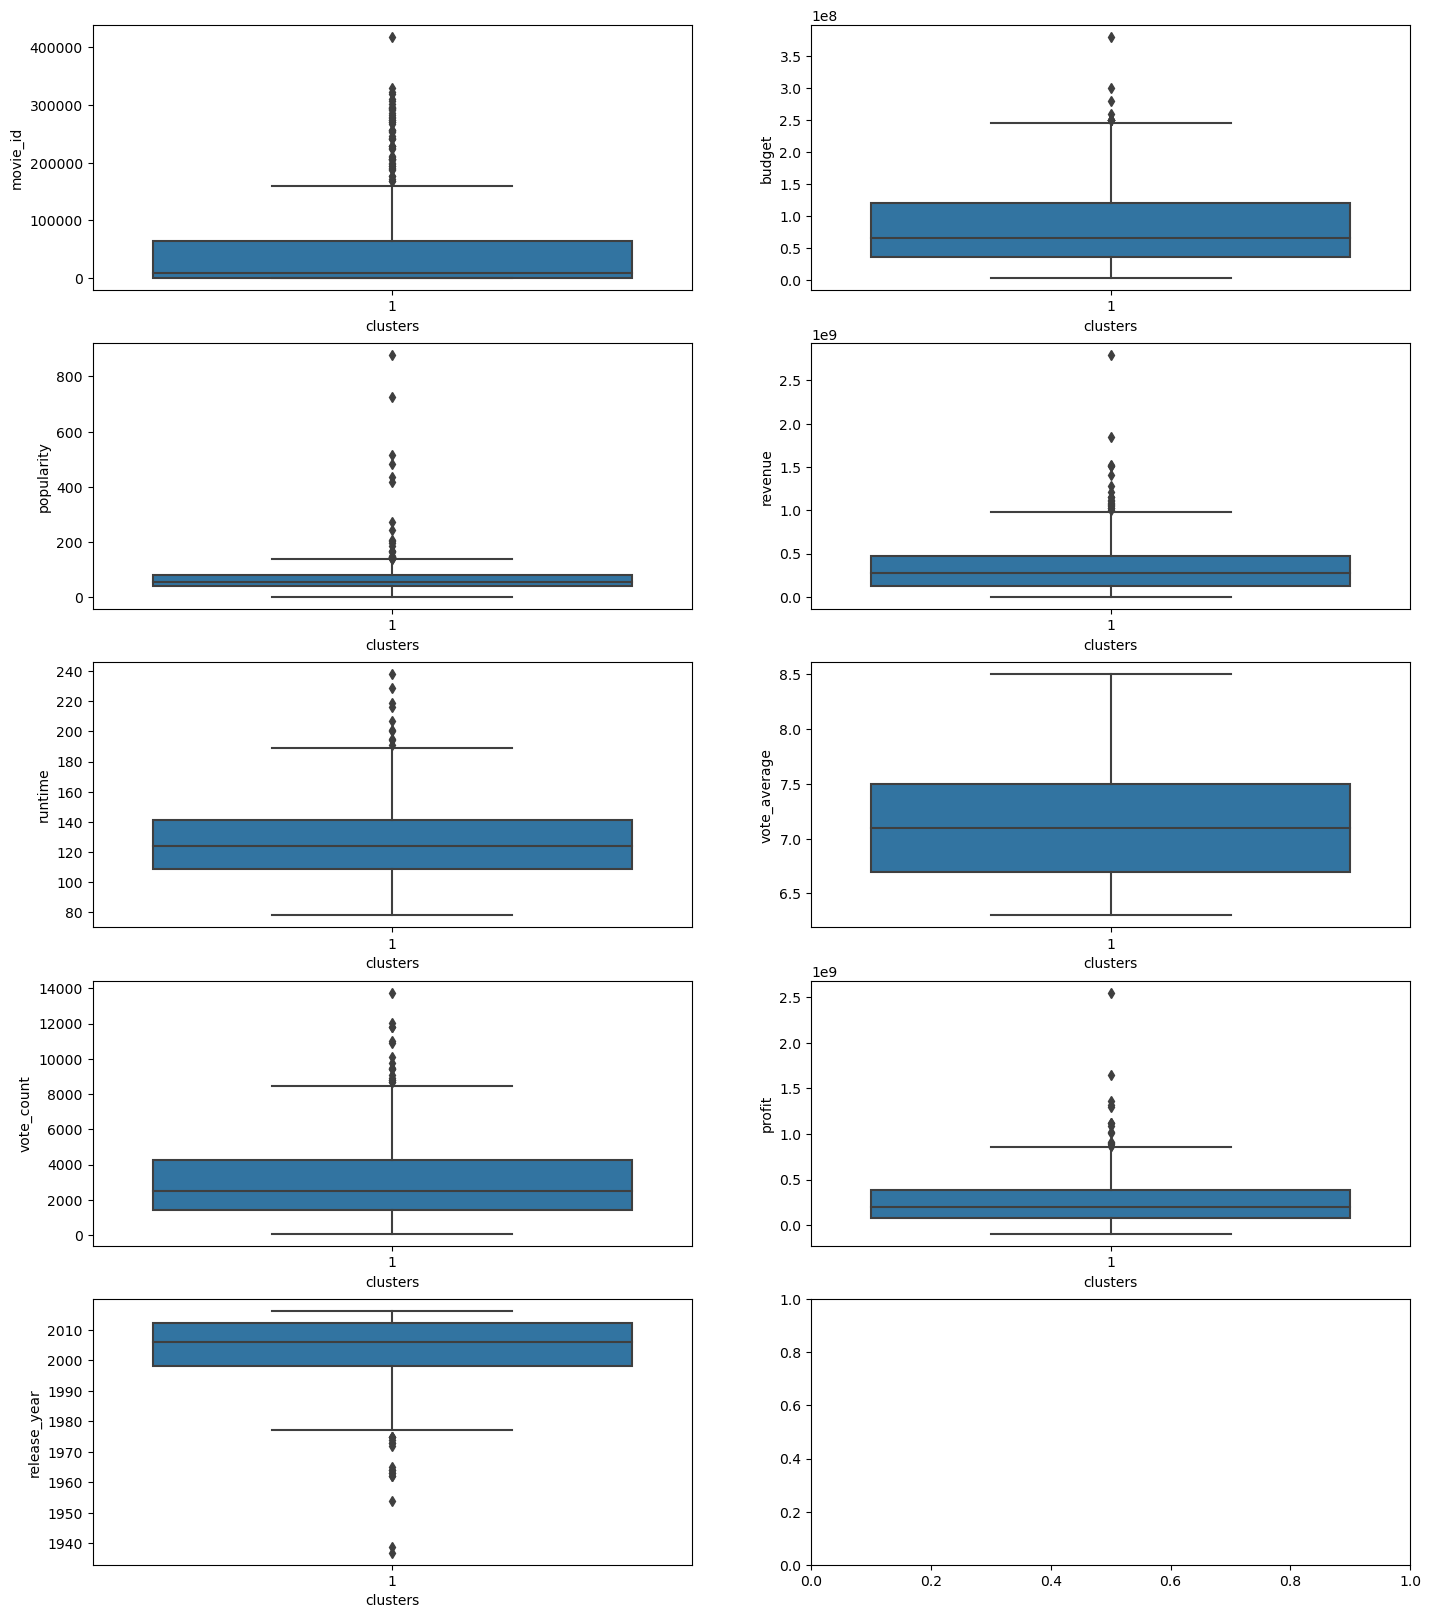

In [122]:
fig,ax=plt.subplots(5,2,figsize=(17,20))
ax=ax.ravel()
for i,j in zip(continuous,range(len(continuous))):
    sns.boxplot(data=top2,y=i,x='clusters',ax=ax[j])

##### KMeans has the best performance for clustering of the top rated movies

##### The features budget, revenue, vote count, popularity , Genre and runtime have an influence on the ratings of movies.
##### Through KMeans ,3 optimal clusters have been formed in top rated movies.
##### The cluster 0 and 2 includes movies with budget of up to 0.5B and 0.7B , while cluster 1 includes movies of budget 2-2.5B.
##### The movies included in cluster 1 also have a higher vote count as compared to the cluster 0 and 2.
##### Cluster 2 movies have the lowest vote average


### for movies with low ratings

In [110]:
for i in obj:                   # using label encoder to non numerical columns to numerical columns
    low_movie[i]=LabelEncoder().fit_transform(low_movie[i])
low_movie.head()

movie_id  title     budget  original_language  popularity  \
4      49529    909  260000000                  3   43.926995   
5        559   1475  258000000                  3  115.699814   
9     209112    219  250000000                  3  155.790452   
10      1452   1535  270000000                  3   57.925623   
11     10764   1269  200000000                  3  107.928811   

    production_companies  production_countries  release_date    revenue  \
4                    751                    48           355  284139100   
5                    156                    48            42  890871626   
9                    174                    48          1345  873260194   
10                   174                    48          1636  391081192   
11                   227                    47          1741  586090727   

    runtime  ...  vote_average  vote_count  director  cast 1  cast 2  \
4     132.0  ...           6.1      2124.0        57    1063     907   
5     139.0  ...           5.9      3576.0      1173    1094     820   
9     151.0  ...           5.7      7004.0      1395     102     517   
10    154.0  ...           5.4      1400.0       173     135     811   
11    106.0  ...           6.1      2965.0       827     248    1105   

    main genre  sub genre     profit  release_year  Rating  
4            1          1   24139100          2012       0  
5            9          0  632871626          2007       0  
9            1          1  623260194          2016       0  
10           2          8  121081192          2006       0  
11           2          0  386090727          2008       0  

[5 rows x 21 columns]

In [111]:
s_df2=pd.DataFrame(normalize(StandardScaler().fit_transform(low_movie)),columns=low_movie.columns)    # sacling the data using scaler
s_df2.head()

movie_id     title    budget  original_language  popularity  \
0 -0.016517 -0.036338  0.735976          -0.014163    0.193729   
1 -0.046392  0.041842  0.407882          -0.007919    0.390557   
2  0.089245 -0.076673  0.313919          -0.006318    0.437413   
3 -0.075118  0.079584  0.705849          -0.013013    0.268445   
4 -0.053297  0.026503  0.418044          -0.010920    0.496444   

   production_companies  production_countries  release_date   revenue  \
0              0.165651              0.066078     -0.126128  0.241248   
1             -0.089111              0.036945     -0.112686  0.508103   
2             -0.066714              0.029478      0.050147  0.396767   
3             -0.137395              0.060709      0.167694  0.329743   
4             -0.092981              0.044488      0.160238  0.442145   

    runtime  ...  vote_average  vote_count  director    cast 1    cast 2  \
0  0.248205  ...      0.112703    0.336542 -0.201355  0.174513  0.045683   
1  0.171147  ...      0.042496    0.348642  0.078078  0.103947  0.011551   
2  0.180837  ...      0.017537    0.580474  0.092559 -0.079827 -0.029664   
3  0.395223  ...     -0.014454    0.177710 -0.152430 -0.153249  0.016602   
4  0.025558  ...      0.086897    0.387660  0.026156 -0.096564  0.079134   

   main genre  sub genre    profit  release_year  Rating  
0   -0.133302  -0.159555 -0.011586      0.095312     0.0  
1    0.046398  -0.099744  0.463495      0.018624     0.0  
2   -0.059468  -0.071179  0.363898      0.064648     0.0  
3   -0.097632  -0.025410  0.112341      0.019210     0.0  
4   -0.081934  -0.137549  0.376427      0.035244     0.0  

[5 rows x 21 columns]

In [112]:
cor_matrix2=s_df2.corr()    # calculating the correlation matrix
cor_matrix2

movie_id     title    budget  original_language  \
movie_id              1.000000  0.002154 -0.128579           0.089455   
title                 0.002154  1.000000  0.002520           0.007860   
budget               -0.128579  0.002520  1.000000          -0.012092   
original_language     0.089455  0.007860 -0.012092           1.000000   
popularity            0.086342 -0.006477  0.538411          -0.023937   
production_companies -0.059375  0.000293  0.080677          -0.015913   
production_countries -0.026036  0.012351 -0.047168          -0.116557   
release_date         -0.001728  0.041626  0.017148          -0.001857   
revenue              -0.046554 -0.002367  0.652538          -0.001012   
runtime              -0.034762  0.016228  0.278297           0.064935   
status                     NaN       NaN       NaN                NaN   
vote_average         -0.105985 -0.007258  0.059195           0.001485   
vote_count            0.118367  0.001319  0.548895           0.002745   
director             -0.013603 -0.001250  0.024980           0.007550   
cast 1                0.005064 -0.027201 -0.013456          -0.003621   
cast 2                0.008959  0.023072 -0.013202           0.025311   
main genre            0.164903  0.026489 -0.155420           0.010518   
sub genre             0.057829  0.002566 -0.174297          -0.022416   
profit                0.006788 -0.004600  0.305093           0.004970   
release_year          0.479294  0.024259  0.039280           0.026454   
Rating                     NaN       NaN       NaN                NaN   

                      popularity  production_companies  production_countries  \
movie_id                0.086342             -0.059375             -0.026036   
title                  -0.006477              0.000293              0.012351   
budget                  0.538411              0.080677             -0.047168   
original_language      -0.023937             -0.015913             -0.116557   
popularity              1.000000              0.042832             -0.044571   
production_companies    0.042832              1.000000             -0.009678   
production_countries   -0.044571             -0.009678              1.000000   
release_date            0.030447              0.006506              0.008854   
revenue                 0.662383              0.065948             -0.009513   
runtime                 0.147954             -0.017917             -0.018697   
status                       NaN                   NaN                   NaN   
vote_average            0.209484              0.003691             -0.002691   
vote_count              0.861006              0.031548             -0.023904   
director                0.009210              0.010190             -0.012359   
cast 1                 -0.012311              0.036684             -0.001863   
cast 2                 -0.013027             -0.010723              0.011255   
main genre             -0.028376             -0.047518             -0.000429   
sub genre              -0.049824             -0.050555              0.032261   
profit                  0.555740              0.041892              0.012916   
release_year            0.227536             -0.064760             -0.043557   
Rating                       NaN                   NaN                   NaN   

                      release_date   revenue   runtime  ...  vote_average  \
movie_id                 -0.001728 -0.046554 -0.034762  ...     -0.105985   
title                     0.041626 -0.002367  0.016228  ...     -0.007258   
budget                    0.017148  0.652538  0.278297  ...      0.059195   
original_language        -0.001857 -0.001012  0.064935  ...      0.001485   
popularity                0.030447  0.662383  0.147954  ...      0.209484   
production_companies      0.006506  0.065948 -0.017917  ...      0.003691   
production_countries      0.008854 -0.009513 -0.018697  ...     -0.002691   
release_date              1.000000  0.

<AxesSubplot:>

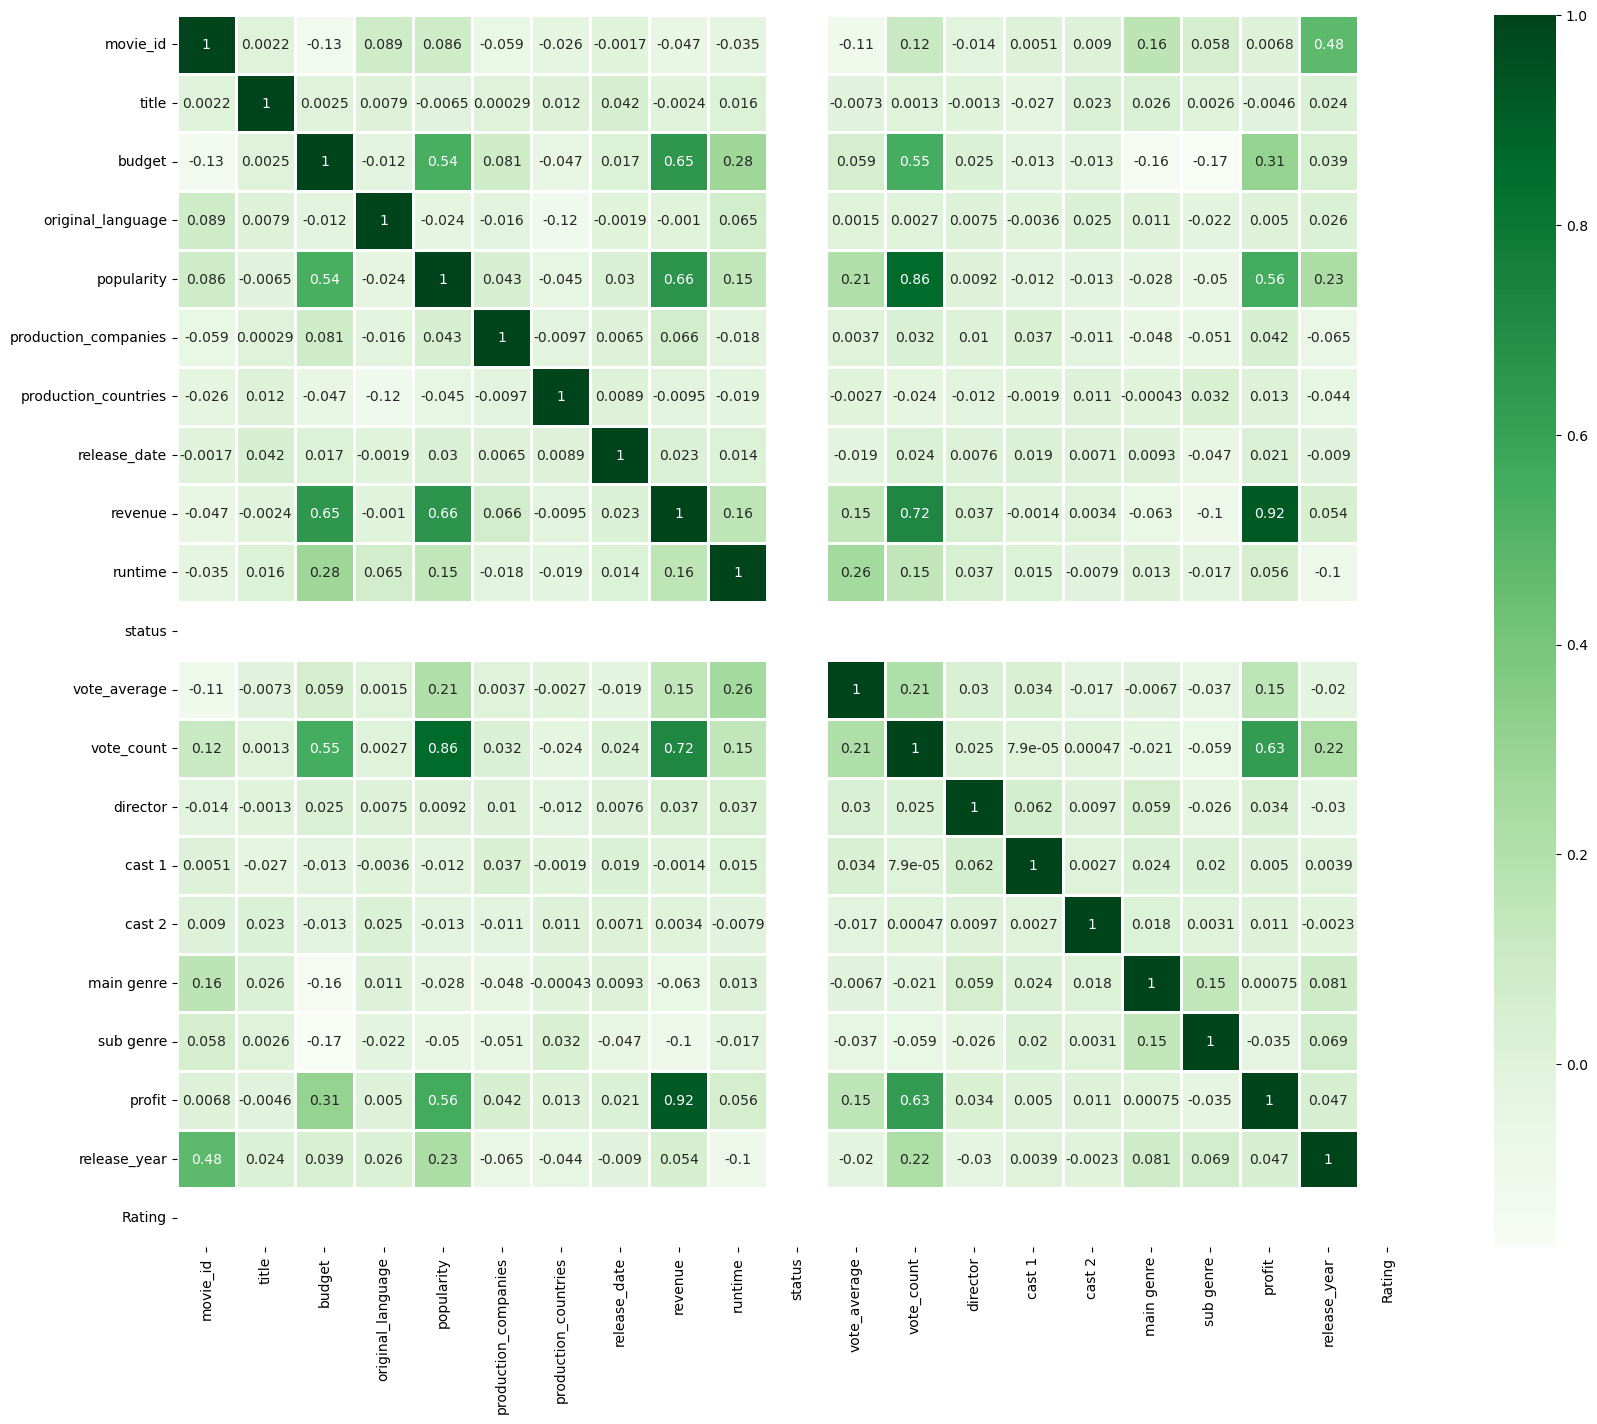

In [113]:
plt.figure(figsize=(20,16))
sns.heatmap(cor_matrix2,annot=True, linewidths=1,cmap='Greens',linecolor='white')

In [114]:
selected_features=correlation(s_df2,0.7)
len(set(selected_features))

2

In [115]:
selected_features

{'profit', 'vote_count'}

In [116]:
s_df2.drop(columns=['profit','release_date','movie_id','title','Rating','status'],inplace=True)

### PCA

In [117]:
pca=PCA()                                            #dimensionality reduction
t_df=pca.fit_transform(s_df2)
features=range(pca.n_components_)

([<matplotlib.axis.XTick at 0x22517332130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

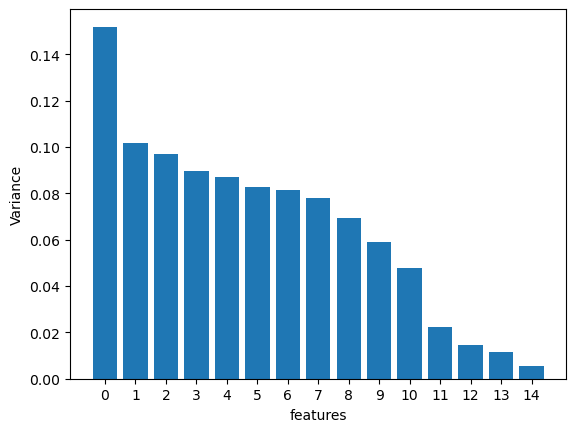

In [118]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel('features')
plt.ylabel('Variance')
plt.xticks(features)

In [119]:
pca2=PCA(n_components=2)                              # selecting number of prinicipal componets
transformed_df2=pca2.fit_transform(s_df2)
transformed_df2.shape

(2189, 2)

Text(0, 0.5, 'pca2')

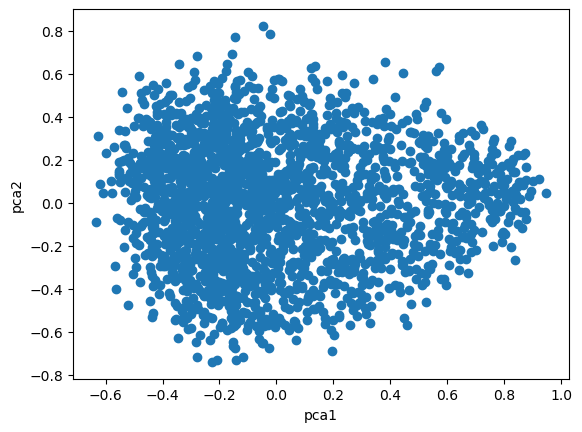

In [120]:
plt.scatter(transformed_df2[:,0],transformed_df2[:,1])   # plotting graph for PCA
plt.xlabel('pca1')
plt.ylabel('pca2')

## KMeans

In [121]:
for i in range(2,11):
    model2=KMeans(n_clusters=i).fit(transformed_df2)
    score=silhouette_score(transformed_df2,model2.labels_,metric='euclidean')
    print(f'k = {i}, score = {score}')

k = 2, score = 0.40626438409934895
k = 3, score = 0.4011052288944838
k = 4, score = 0.3683611448194071
k = 5, score = 0.3609616080247069
k = 6, score = 0.3552039641293173
k = 7, score = 0.35832194147489455
k = 8, score = 0.3493829820777473
k = 9, score = 0.33473010069899434
k = 10, score = 0.34282171629786484


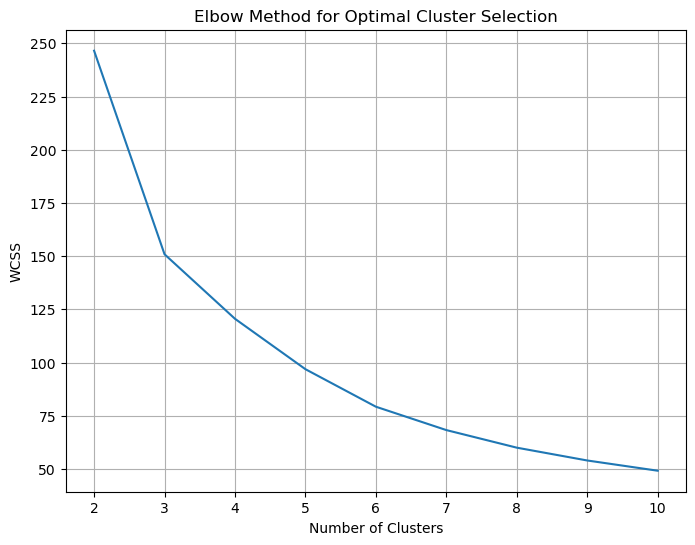

In [122]:
dist=[]                                                  # to select optimal value by elbow method
for i in range(2,11):
    model2=KMeans(n_clusters=i).fit(transformed_df2)
    dist.append(model2.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(2,11),dist) 
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.grid()
plt.show()

In [123]:
kmodel2=KMeans(n_clusters=3).fit(transformed_df2)            # fitting the model 
kmodel2.cluster_centers_

array([[-0.12415505, -0.28448565],
       [ 0.48024208,  0.04055187],
       [-0.20226243,  0.21693164]])

In [124]:
klabels2=kmodel2.labels_               # cluster labels
klabels2

array([1, 1, 1, ..., 2, 2, 2])

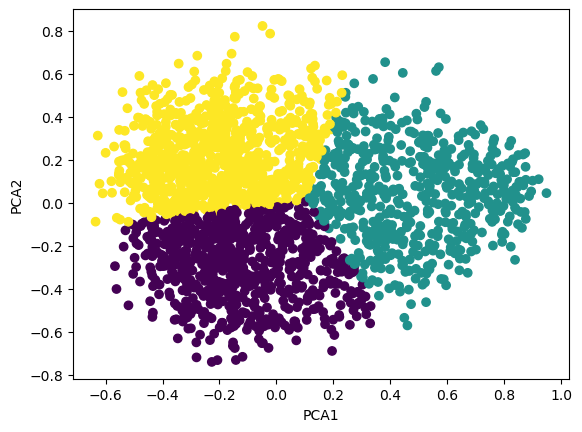

In [125]:
plt.scatter(transformed_df2[:,0],transformed_df2[:,1],c=kmodel2.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### Agglomerative hierarcheal

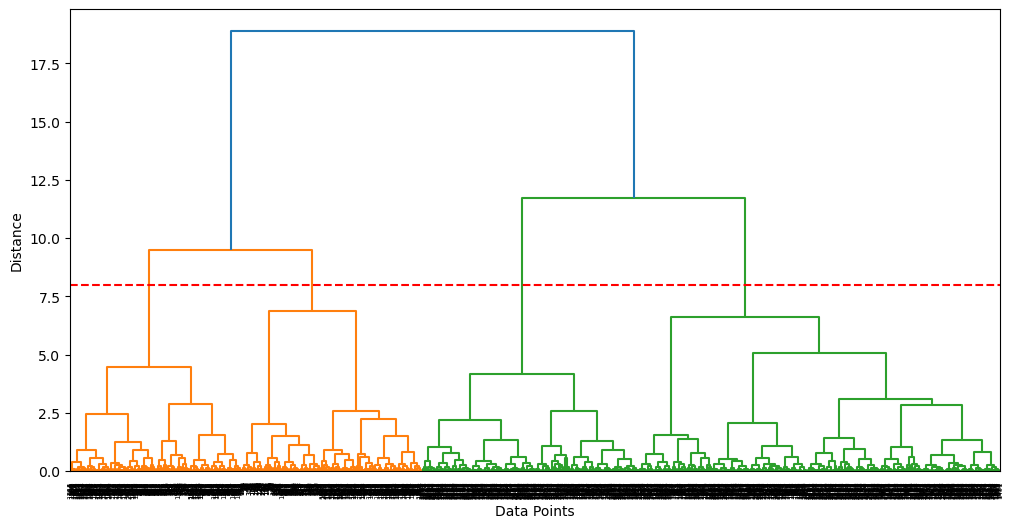

In [126]:
linkage_data2= linkage(transformed_df2,method='ward',metric='euclidean')
plt.figure(figsize=(12,6))
dendrogram(linkage_data2)
plt.axhline(y=8,color='red',linestyle='--')             #finding optimal cluster values using dendrogram
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [127]:
h_model2= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hlabels2=h_model2.fit_predict(transformed_df2)                #fitting the model

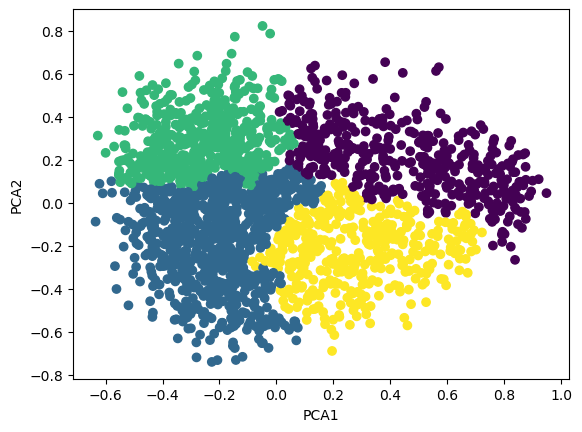

In [128]:
plt.scatter(transformed_df2[:,0],transformed_df2[:,1],c=hlabels2)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()    

### DBSCAN

In [129]:
neighbours2=NearestNeighbors(n_neighbors=5)       
neigh_fit2=neighbours2.fit(transformed_df2)
distance2, index=neigh_fit2.kneighbors(transformed_df2)

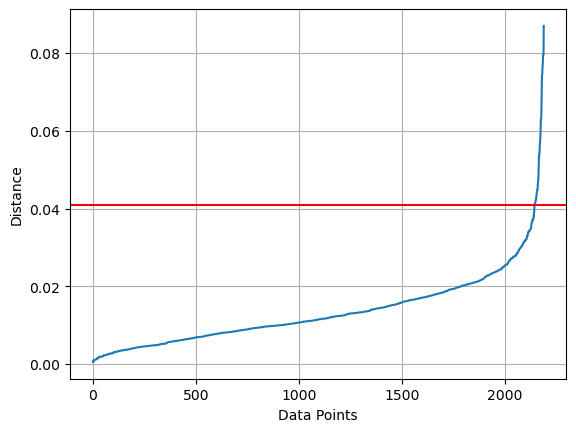

In [130]:
distances2=np.sort(distance2,axis=0)            #finding optimal epsilon value
distances2=distances2[:,1]
plt.plot(distances2)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid()
plt.axhline(y=0.041,color="r")

In [131]:
for i in range(2,16):                                                   #min_samples based on score
    model2 = DBSCAN(eps=0.041, min_samples=i)
    model2.fit(transformed_df2)
    score = silhouette_score(transformed_df2, model2.labels_)
    print(f'min_samples = {i}, score = {score}')

min_samples = 2, score = -0.4318040029316432
min_samples = 3, score = -0.338398513223582
min_samples = 4, score = -0.28798190418854436
min_samples = 5, score = -0.14280527519448286
min_samples = 6, score = -0.19174610242046944
min_samples = 7, score = -0.16574137006015044
min_samples = 8, score = -0.21058880830686857
min_samples = 9, score = -0.13236842294990916
min_samples = 10, score = -0.2667806446526253
min_samples = 11, score = -0.36860374703116494
min_samples = 12, score = -0.4039179989596016
min_samples = 13, score = -0.37198534500822883
min_samples = 14, score = -0.32806859736453065
min_samples = 15, score = -0.18035147966352946


In [132]:
eps2=0.041
for i in range(1,16):
    db2=DBSCAN(eps=eps2,min_samples=i)
    db2.fit(t_df2)
    labels2=db2.labels_

    new_labels2=labels2+2
    y=np.bincount(new_labels2)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print("min_sample:",i,"cluster:",cluster)

min_sample: 1 cluster: [(2, 2032), (3, 2), (4, 1), (5, 1), (6, 5), (7, 1), (8, 2), (9, 1), (10, 5), (11, 7), (12, 3), (13, 2), (14, 5), (15, 4), (16, 1), (17, 2), (18, 1), (19, 1), (20, 14), (21, 1), (22, 6), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 7), (29, 1), (30, 4), (31, 1), (32, 1), (33, 1), (34, 6), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 1), (45, 1), (46, 3), (47, 2), (48, 1), (49, 4), (50, 1), (51, 1), (52, 3), (53, 2), (54, 7), (55, 2), (56, 9), (57, 2), (58, 5), (59, 2), (60, 4), (61, 5), (62, 1), (63, 2), (64, 2), (65, 3), (66, 1), (67, 3), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)]
min_sample: 2 cluster: [(1, 55), (2, 2032), (3, 2), (4, 5), (5, 2), (6, 5), (7, 7), (8, 3), (9, 2), (10, 5), (11, 4), (12, 2), (13, 14), (14, 6), (15, 2

In [133]:
db2=DBSCAN(eps=eps2,min_samples=4)
db2.fit(transformed_df2)
dlabels2=db2.labels_

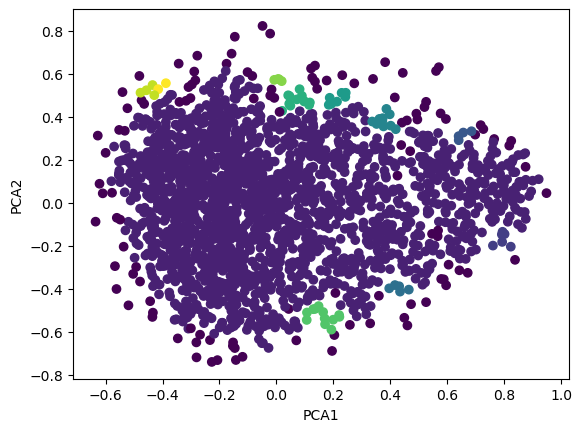

In [134]:
plt.scatter(transformed_df2[:,0],transformed_df2[:,1],c=dlabels2,)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [135]:
Kscore2=silhouette_score(transformed_df2,kmodel2.labels_,metric='euclidean')
AHscore2=silhouette_score(transformed_df2,h_model2.labels_,metric='euclidean')
DBscore2=silhouette_score(transformed_df2,db2.labels_,metric='euclidean')
print('Scores for models')
print()
print('Kmean      : ',Kscore2)
print('Hirachical : ',AHscore2)
print('DBSCAN     : ',DBscore2)

Scores for models

Kmean      :  0.4011052288944838
Hirachical :  0.3149667604701139
DBSCAN     :  -0.28798190418854436


In [136]:
low_rated['clusters'] = klabels2
low_rated.head()

movie_id                               title     budget original_language  \
4      49529                         John Carter  260000000                en   
5        559                        Spider-Man 3  258000000                en   
9     209112  Batman v Superman: Dawn of Justice  250000000                en   
10      1452                    Superman Returns  270000000                en   
11     10764                   Quantum of Solace  200000000                en   

    popularity  production_companies      production_countries release_date  \
4    43.926995  Walt Disney Pictures  United States of America   07-03-2012   
5   115.699814     Columbia Pictures  United States of America   01-05-2007   
9   155.790452             DC Comics  United States of America   23-03-2016   
10   57.925623             DC Comics  United States of America   28-06-2006   
11  107.928811       Eon Productions            United Kingdom   30-10-2008   

      revenue  runtime  ... vote_count        director         cast 1  \
4   284139100    132.0  ...     2124.0  Andrew Stanton  Taylor Kitsch   
5   890871626    139.0  ...     3576.0       Sam Raimi  Tobey Maguire   
9   873260194    151.0  ...     7004.0     Zack Snyder    Ben Affleck   
10  391081192    154.0  ...     1400.0    Bryan Singer  Brandon Routh   
11  586090727    106.0  ...     2965.0    Marc Forster   Daniel Craig   

            cast 2 main genre  sub genre     profit release_year  Rating  \
4     Lynn Collins     Action  Adventure   24139100         2012    Poor   
5    Kirsten Dunst    Fantasy     Action  632871626         2007    Poor   
9     Henry Cavill     Action  Adventure  623260194         2016    Poor   
10    Kevin Spacey  Adventure    Fantasy  121081192         2006    Poor   
11  Olga Kurylenko  Adventure     Action  386090727         2008    Poor   

    clusters  
4          1  
5          1  
9          1  
10         1  
11         1  

[5 rows x 22 columns]

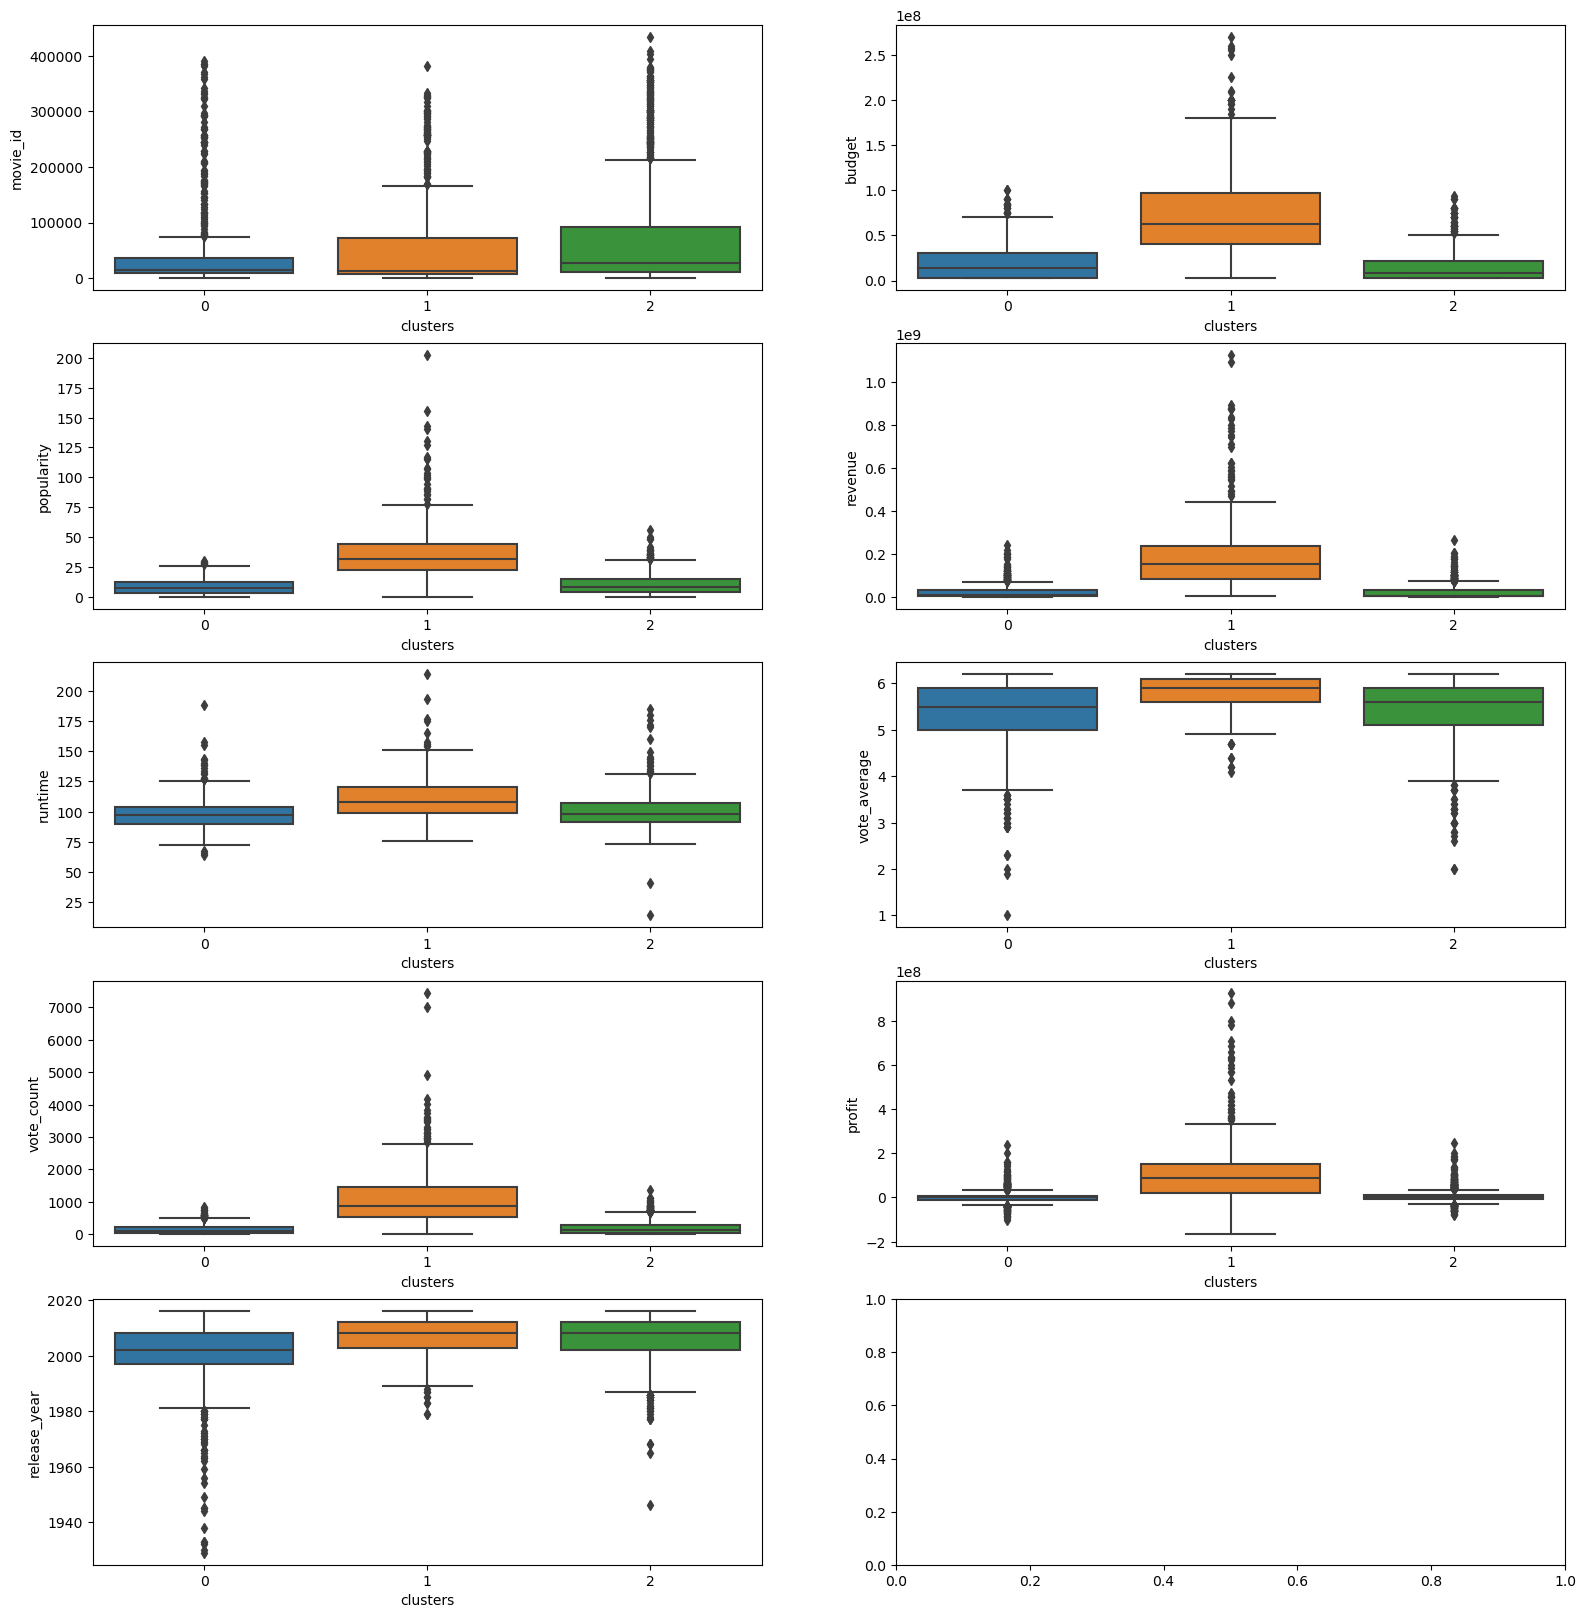

In [137]:
fig,ax=plt.subplots(5,2,figsize=(19,20))
ax=ax.ravel()
for i,j in zip(continuous,range(len(continuous))):
    sns.boxplot(data=low_rated,y=i,x='clusters',ax=ax[j])

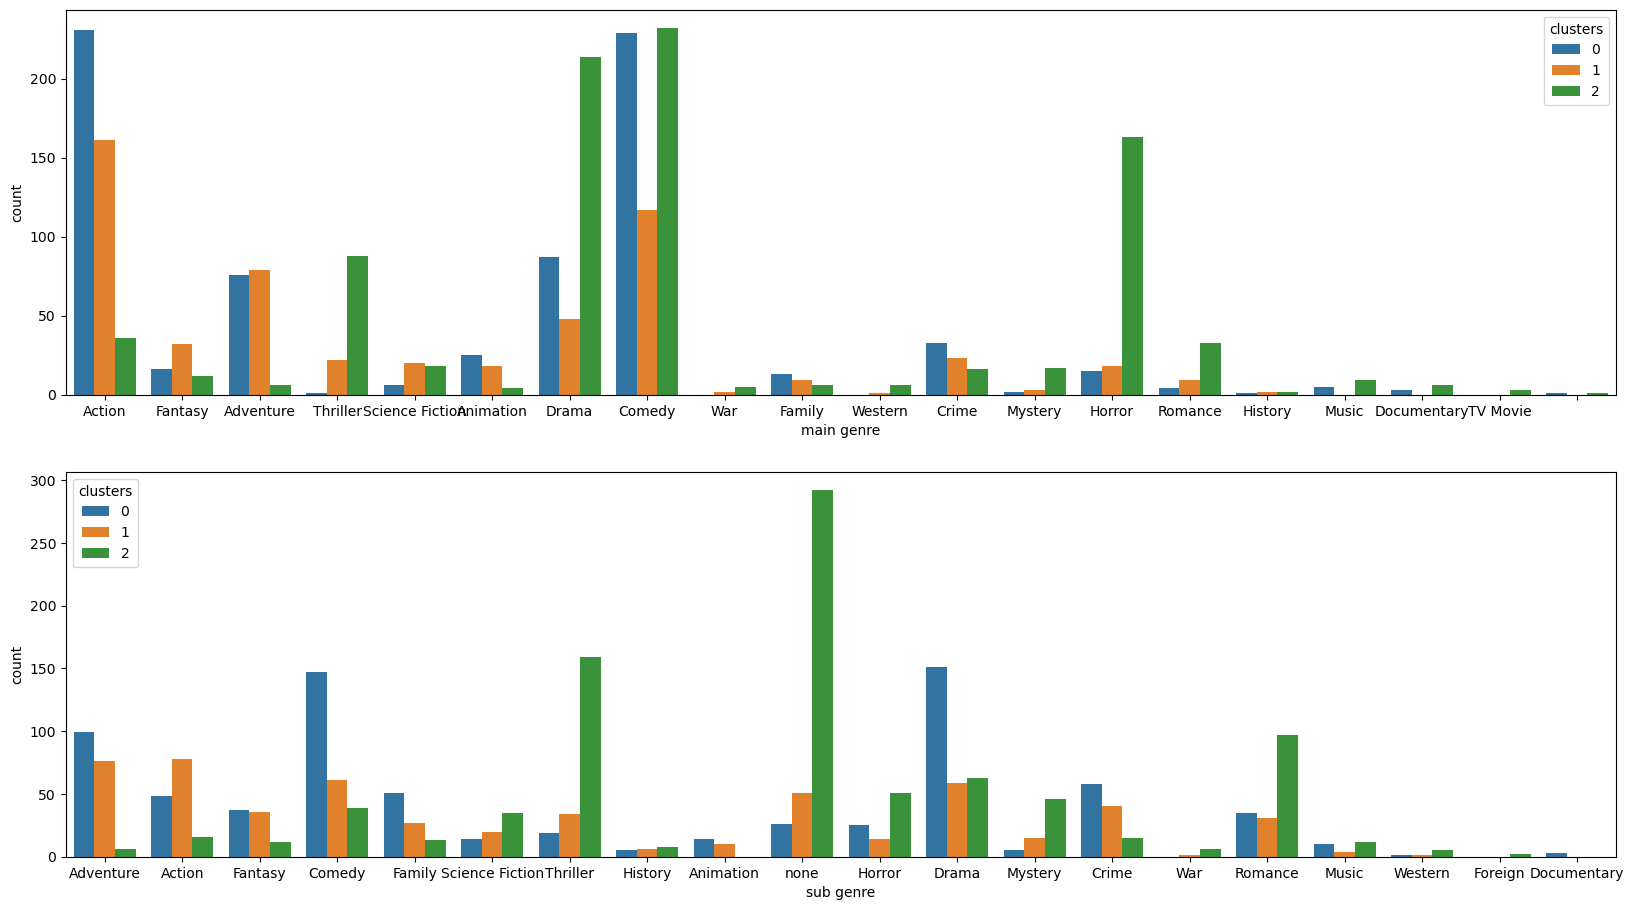

In [138]:
fig,ax=plt.subplots(2,1,figsize=(20,11))
ax=ax.ravel()
for i,j in zip(cat,range(len(categorical))):
    sns.countplot(data=low_rated,x=i,hue='clusters',ax=ax[j])

In [139]:
low_rated.describe()

movie_id        budget   popularity       revenue      runtime  \
count    2189.000000  2.189000e+03  2189.000000  2.189000e+03  2189.000000   
mean    61700.040658  3.212434e+07    16.382627  6.485924e+07   101.992397   
std     91482.006454  3.843951e+07    17.651531  1.128438e+08    15.009420   
min        74.000000  2.600000e+06     0.001586  1.200000e+01    14.000000   
25%      9969.000000  2.600000e+06     4.665309  2.600000e+06    92.000000   
50%     16643.000000  2.000000e+07    11.199544  1.729724e+07   100.000000   
75%     64639.000000  4.500000e+07    21.723897  7.838243e+07   110.000000   
max    433715.000000  2.700000e+08   202.042635  1.123747e+09   214.000000   

       vote_average   vote_count        profit  release_year     clusters  
count   2189.000000  2189.000000  2.189000e+03   2189.000000  2189.000000  
mean       5.485746   421.481715  3.252965e+07   2004.313842     1.058931  
std        0.676640   628.052153  8.990758e+07     10.011634     0.859775  
min        1.000000     1.000000 -1.657101e+08   1929.000000     0.000000  
25%        5.200000    56.000000 -5.000000e+06   2000.000000     0.000000  
50%        5.700000   197.000000  0.000000e+00   2006.000000     1.000000  
75%        6.000000   518.000000  4.200000e+07   2011.000000     2.000000  
max        6.200000  7458.000000  9.287470e+08   2016.000000     2.000000

In [140]:
c1=low_rated['clusters']==0
low1=low_rated[c1]

In [141]:
c2=low_rated['clusters']==1
low2=low_rated[c2]

In [142]:
c3=low_rated['clusters']==2
low3=low_rated[c3]

In [143]:
low1.head(3)

movie_id               title    budget original_language  popularity  \
83      79698          The Lovers  27000000                en    2.418535   
265     10588  The Cat in the Hat   2600000                en   18.251129   
309     10214     Son of the Mask  84000000                en   17.815595   

      production_companies      production_countries release_date  revenue  \
83                  Corsan                 Australia   13-02-2015  2600000   
265  Imagine Entertainment  United States of America   21-11-2003  2600000   
309        New Line Cinema                   Germany   18-02-2005  2600000   

     runtime  ... vote_count           director         cast 1  \
83     109.0  ...       34.0       Roland Joffé  Josh Hartnett   
265     82.0  ...      366.0           Bo Welch     Mike Myers   
309     94.0  ...      338.0  Lawrence Guterman  Jamie Kennedy   

             cast 2 main genre  sub genre    profit release_year  Rating  \
83   Simone Kessell     Action  Adventure -27000000         2015    Poor   
265  Dakota Fanning     Comedy    Fantasy         0         2003    Poor   
309    Alan Cumming    Fantasy     Comedy -84000000         2005    Poor   

     clusters  
83          0  
265         0  
309         0  

[3 rows x 22 columns]

In [144]:
low1.describe()

movie_id        budget  popularity       revenue     runtime  \
count     748.000000  7.480000e+02  748.000000  7.480000e+02  748.000000   
mean    42225.648396  2.012837e+07    8.571398  2.321966e+07   97.984683   
std     71656.090765  2.027912e+07    6.324865  3.490744e+07   12.497648   
min        83.000000  2.600000e+06    0.001586  1.200000e+01   64.000000   
25%     10149.500000  2.600000e+06    3.386800  2.600000e+06   90.000000   
50%     14400.500000  1.350000e+07    7.234046  6.055000e+06   97.000000   
75%     35860.750000  3.000000e+07   12.601399  3.054692e+07  104.000000   
max    389425.000000  1.000000e+08   29.652536  2.396062e+08  188.000000   

       vote_average  vote_count        profit  release_year  clusters  
count    748.000000  748.000000  7.480000e+02    748.000000     748.0  
mean       5.307944  148.834315  2.823081e+06   2000.203209       0.0  
std        0.757002  150.208424  3.260831e+07     12.553239       0.0  
min        1.000000    1.000000 -1.000000e+08   1929.000000       0.0  
25%        5.000000   36.000000 -9.811621e+06   1997.000000       0.0  
50%        5.500000   97.000000  0.000000e+00   2002.000000       0.0  
75%        5.900000  220.000000  7.755559e+06   2008.000000       0.0  
max        6.200000  832.000000  2.396062e+08   2016.000000       0.0

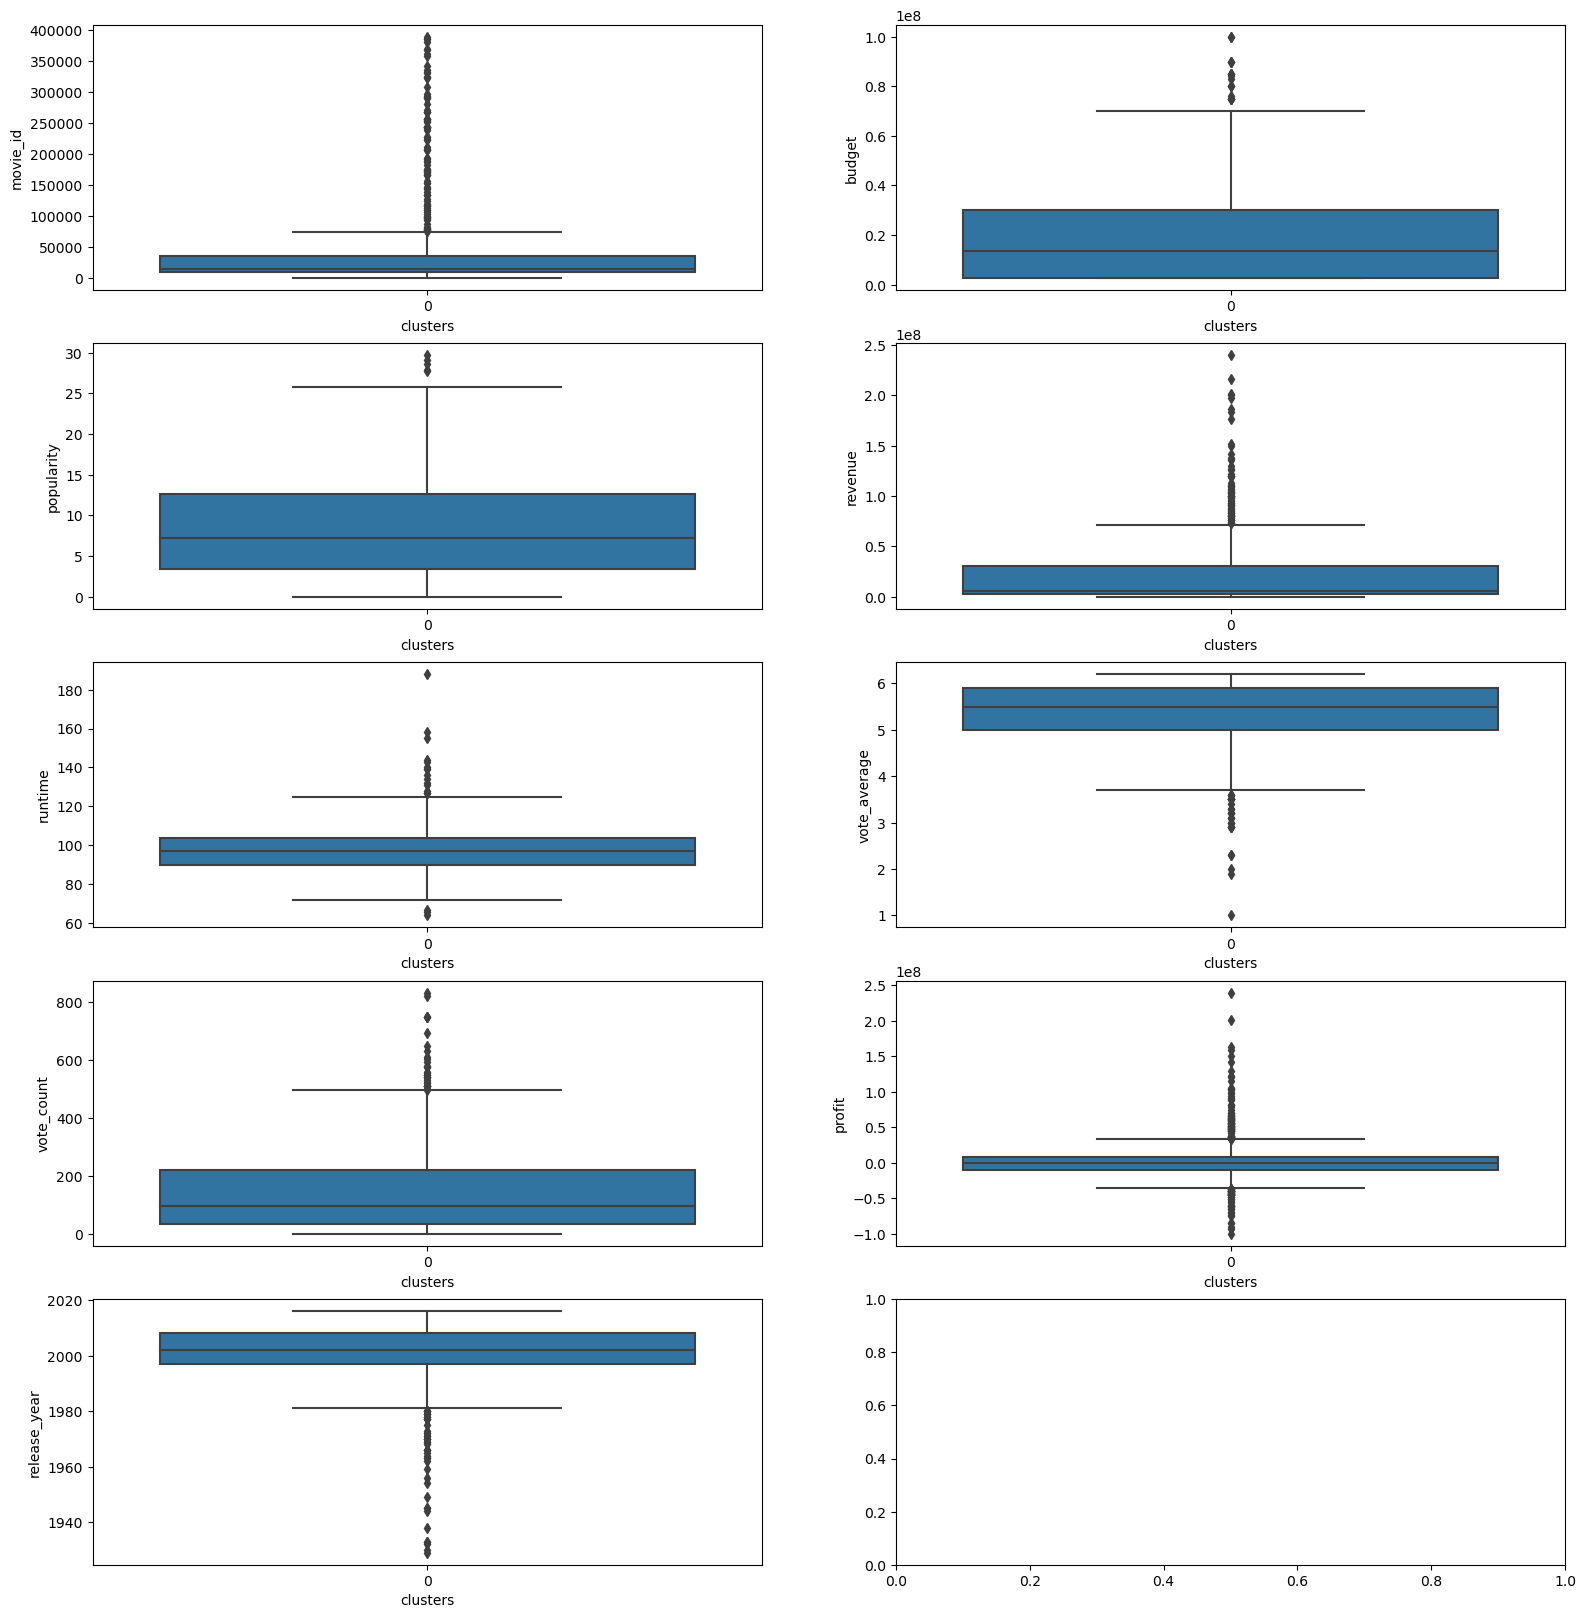

In [145]:
fig,ax=plt.subplots(5,2,figsize=(19,20))
ax=ax.ravel()
for i,j in zip(continuous,range(len(continuous))):
    sns.boxplot(data=low1,y=i,x='clusters',ax=ax[j])

In [146]:
low2.head(3)

movie_id                               title     budget original_language  \
4     49529                         John Carter  260000000                en   
5       559                        Spider-Man 3  258000000                en   
9    209112  Batman v Superman: Dawn of Justice  250000000                en   

   popularity  production_companies      production_countries release_date  \
4   43.926995  Walt Disney Pictures  United States of America   07-03-2012   
5  115.699814     Columbia Pictures  United States of America   01-05-2007   
9  155.790452             DC Comics  United States of America   23-03-2016   

     revenue  runtime  ... vote_count        director         cast 1  \
4  284139100    132.0  ...     2124.0  Andrew Stanton  Taylor Kitsch   
5  890871626    139.0  ...     3576.0       Sam Raimi  Tobey Maguire   
9  873260194    151.0  ...     7004.0     Zack Snyder    Ben Affleck   

          cast 2 main genre  sub genre     profit release_year  Rating  \
4   Lynn Collins     Action  Adventure   24139100         2012    Poor   
5  Kirsten Dunst    Fantasy     Action  632871626         2007    Poor   
9   Henry Cavill     Action  Adventure  623260194         2016    Poor   

   clusters  
4         1  
5         1  
9         1  

[3 rows x 22 columns]

In [147]:
low2.describe()

movie_id        budget  popularity       revenue     runtime  \
count     564.000000  5.640000e+02  564.000000  5.640000e+02  564.000000   
mean    58286.680851  7.448474e+07   36.106928  1.863644e+08  110.118794   
std     84638.821891  4.799689e+07   22.576266  1.616544e+08   16.515510   
min        74.000000  2.600000e+06    0.077873  2.600000e+06   76.000000   
25%      8218.500000  4.000000e+07   22.025825  8.209857e+07   98.750000   
50%     12319.000000  6.300000e+07   31.673509  1.523459e+08  108.000000   
75%     71681.250000  9.743780e+07   44.103157  2.353299e+08  120.000000   
max    381902.000000  2.700000e+08  202.042635  1.123747e+09  214.000000   

       vote_average   vote_count        profit  release_year  clusters  
count    564.000000   564.000000  5.640000e+02    564.000000     564.0  
mean       5.806349  1114.123563  1.118519e+08   2006.946809       1.0  
std        0.361274   879.218168  1.408632e+08      6.733496       0.0  
min        4.100000    13.000000 -1.657101e+08   1979.000000       1.0  
25%        5.600000   514.250000  1.929005e+07   2002.750000       1.0  
50%        5.900000   861.500000  8.946204e+07   2008.000000       1.0  
75%        6.100000  1439.750000  1.521779e+08   2012.000000       1.0  
max        6.200000  7458.000000  9.287470e+08   2016.000000       1.0

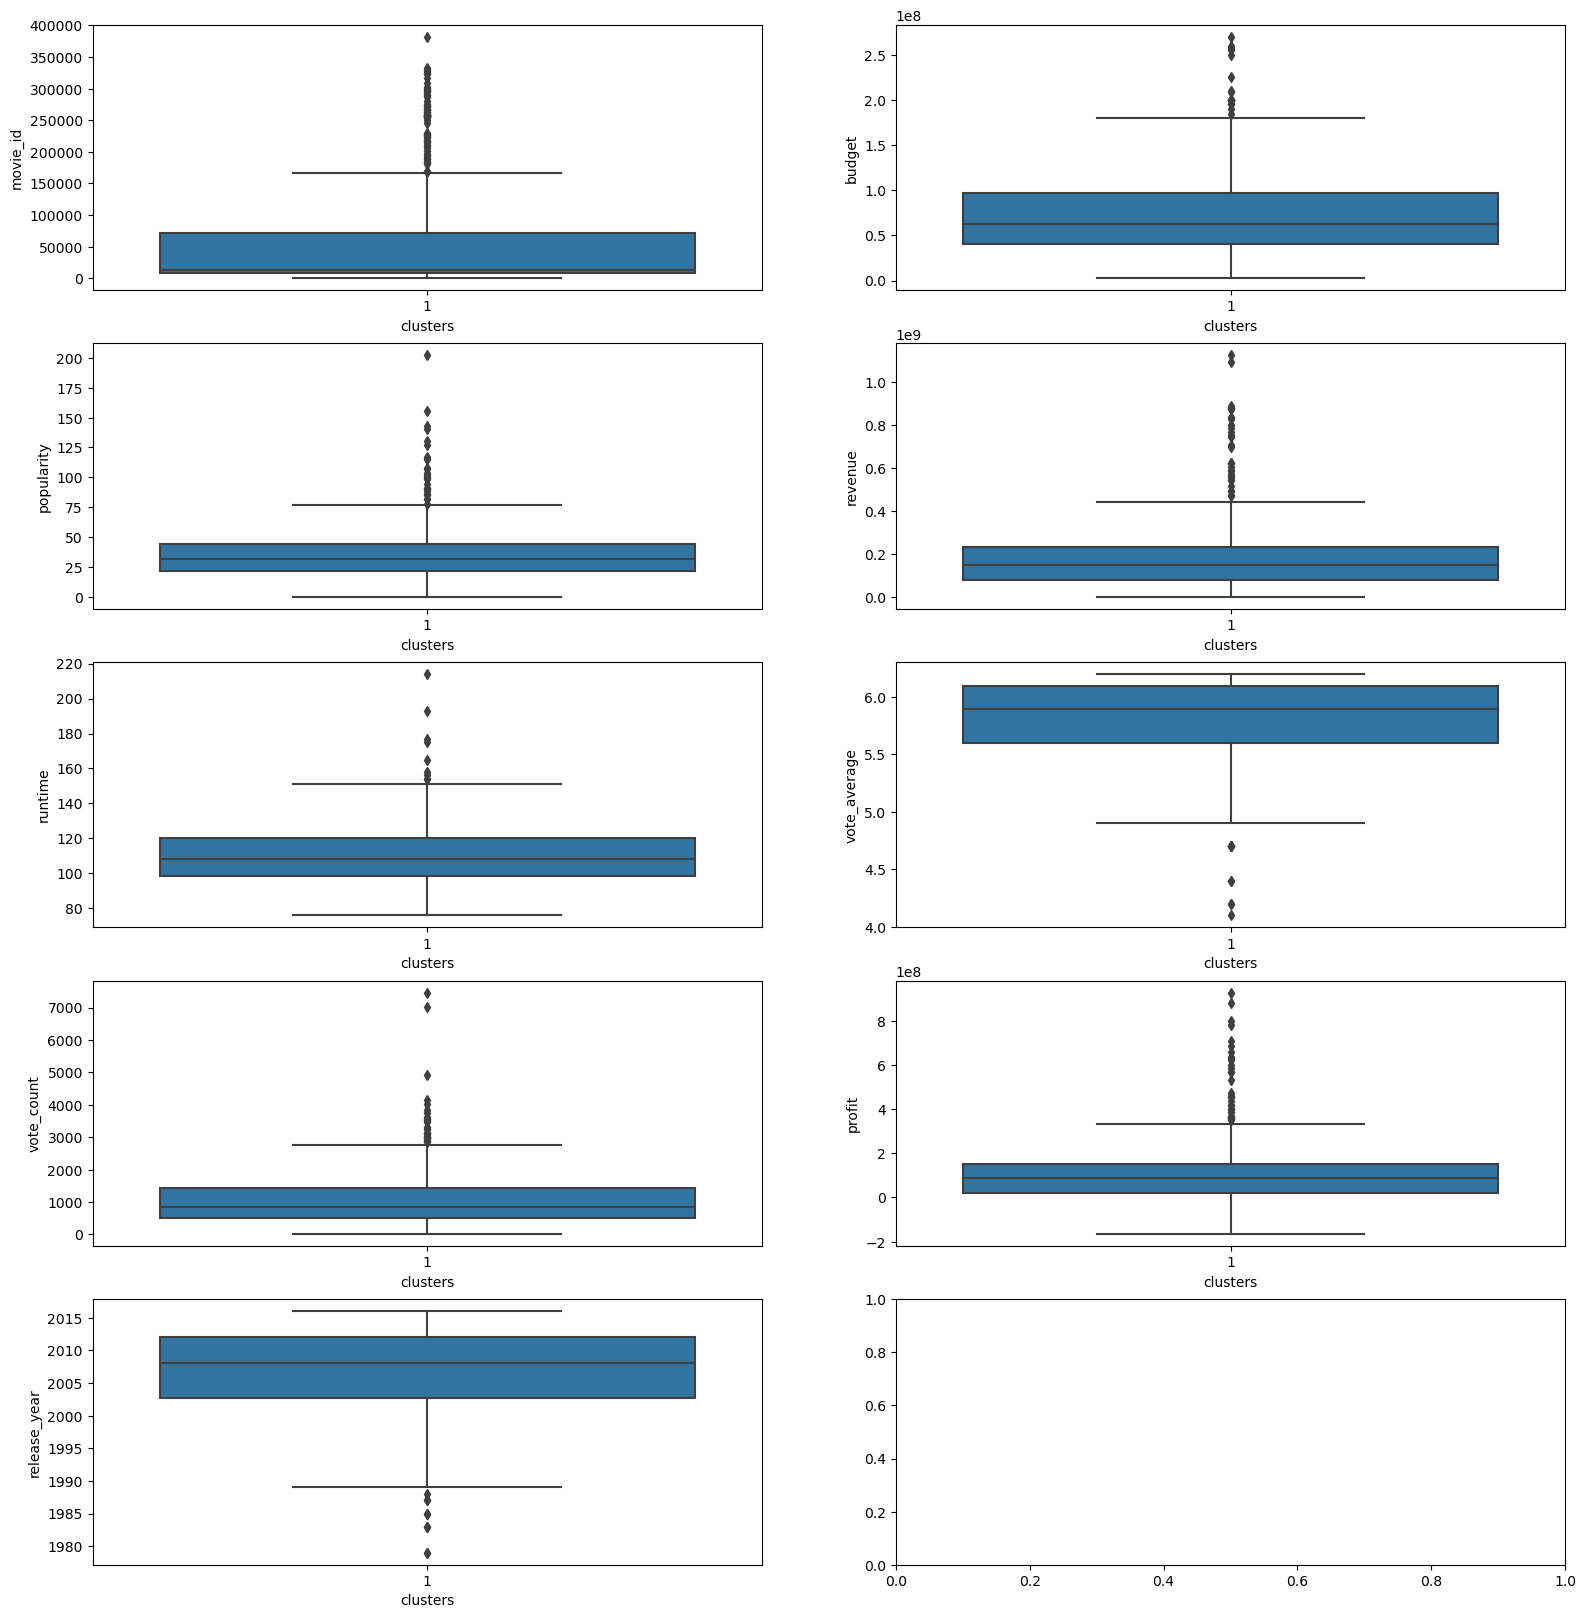

In [148]:
fig,ax=plt.subplots(5,2,figsize=(19,20))
ax=ax.ravel()
for i,j in zip(continuous,range(len(continuous))):
    sns.boxplot(data=low2,y=i,x='clusters',ax=ax[j])

In [149]:
low3.head(3)

movie_id            title    budget original_language  popularity  \
321     77953     The Campaign   2600000                en   16.460356   
373      2067  Mission to Mars  90000000                en   16.058284   
451     11618     The Haunting  80000000                en   19.375768   

       production_companies      production_countries release_date    revenue  \
321       Everyman Pictures  United States of America   09-08-2012  104907746   
373  Spyglass Entertainment  United States of America   10-03-2000   60874615   
451              DreamWorks  United States of America   23-07-1999   91188905   

     runtime  ... vote_count        director        cast 1  \
321     85.0  ...      578.0       Jay Roach  Will Ferrell   
373    114.0  ...      369.0  Brian De Palma   Gary Sinise   
451    113.0  ...      369.0     Jan de Bont   Liam Neeson   

                   cast 2       main genre sub genre     profit release_year  \
321     Zach Galifianakis           Comedy      none  104907746         2012   
373           Tim Robbins  Science Fiction      none  -29125385         2000   
451  Catherine Zeta-Jones           Horror  Thriller   11188905         1999   

     Rating  clusters  
321    Poor         2  
373    Poor         2  
451    Poor         2  

[3 rows x 22 columns]

In [150]:
low3.describe()

movie_id        budget  popularity       revenue     runtime  \
count     877.000000  8.770000e+02  877.000000  8.770000e+02  877.000000   
mean    80505.035348  1.511377e+07   10.360157  2.223381e+07  100.184509   
std    105996.968219  1.707312e+07    8.811889  3.415234e+07   13.953297   
min       172.000000  2.600000e+06    0.006069  1.200000e+01   14.000000   
25%     10760.000000  2.600000e+06    3.653305  2.600000e+06   91.000000   
50%     26688.000000  8.000000e+06    8.190888  2.600000e+06   98.000000   
75%     92182.000000  2.200000e+07   14.653718  3.055150e+07  107.000000   
max    433715.000000  9.400000e+07   56.304660  2.665868e+08  185.000000   

       vote_average   vote_count        profit  release_year  clusters  
count    877.000000   877.000000  8.770000e+02    877.000000     877.0  
mean       5.431213   208.585767  6.854325e+06   2006.126568       2.0  
std        0.689103   226.786089  3.265113e+07      8.040774       0.0  
min        2.000000     1.000000 -8.000000e+07   1946.000000       2.0  
25%        5.100000    38.000000 -6.272254e+06   2002.000000       2.0  
50%        5.600000   127.000000  0.000000e+00   2008.000000       2.0  
75%        5.900000   293.000000  1.051201e+07   2012.000000       2.0  
max        6.200000  1360.000000  2.485868e+08   2016.000000       2.0

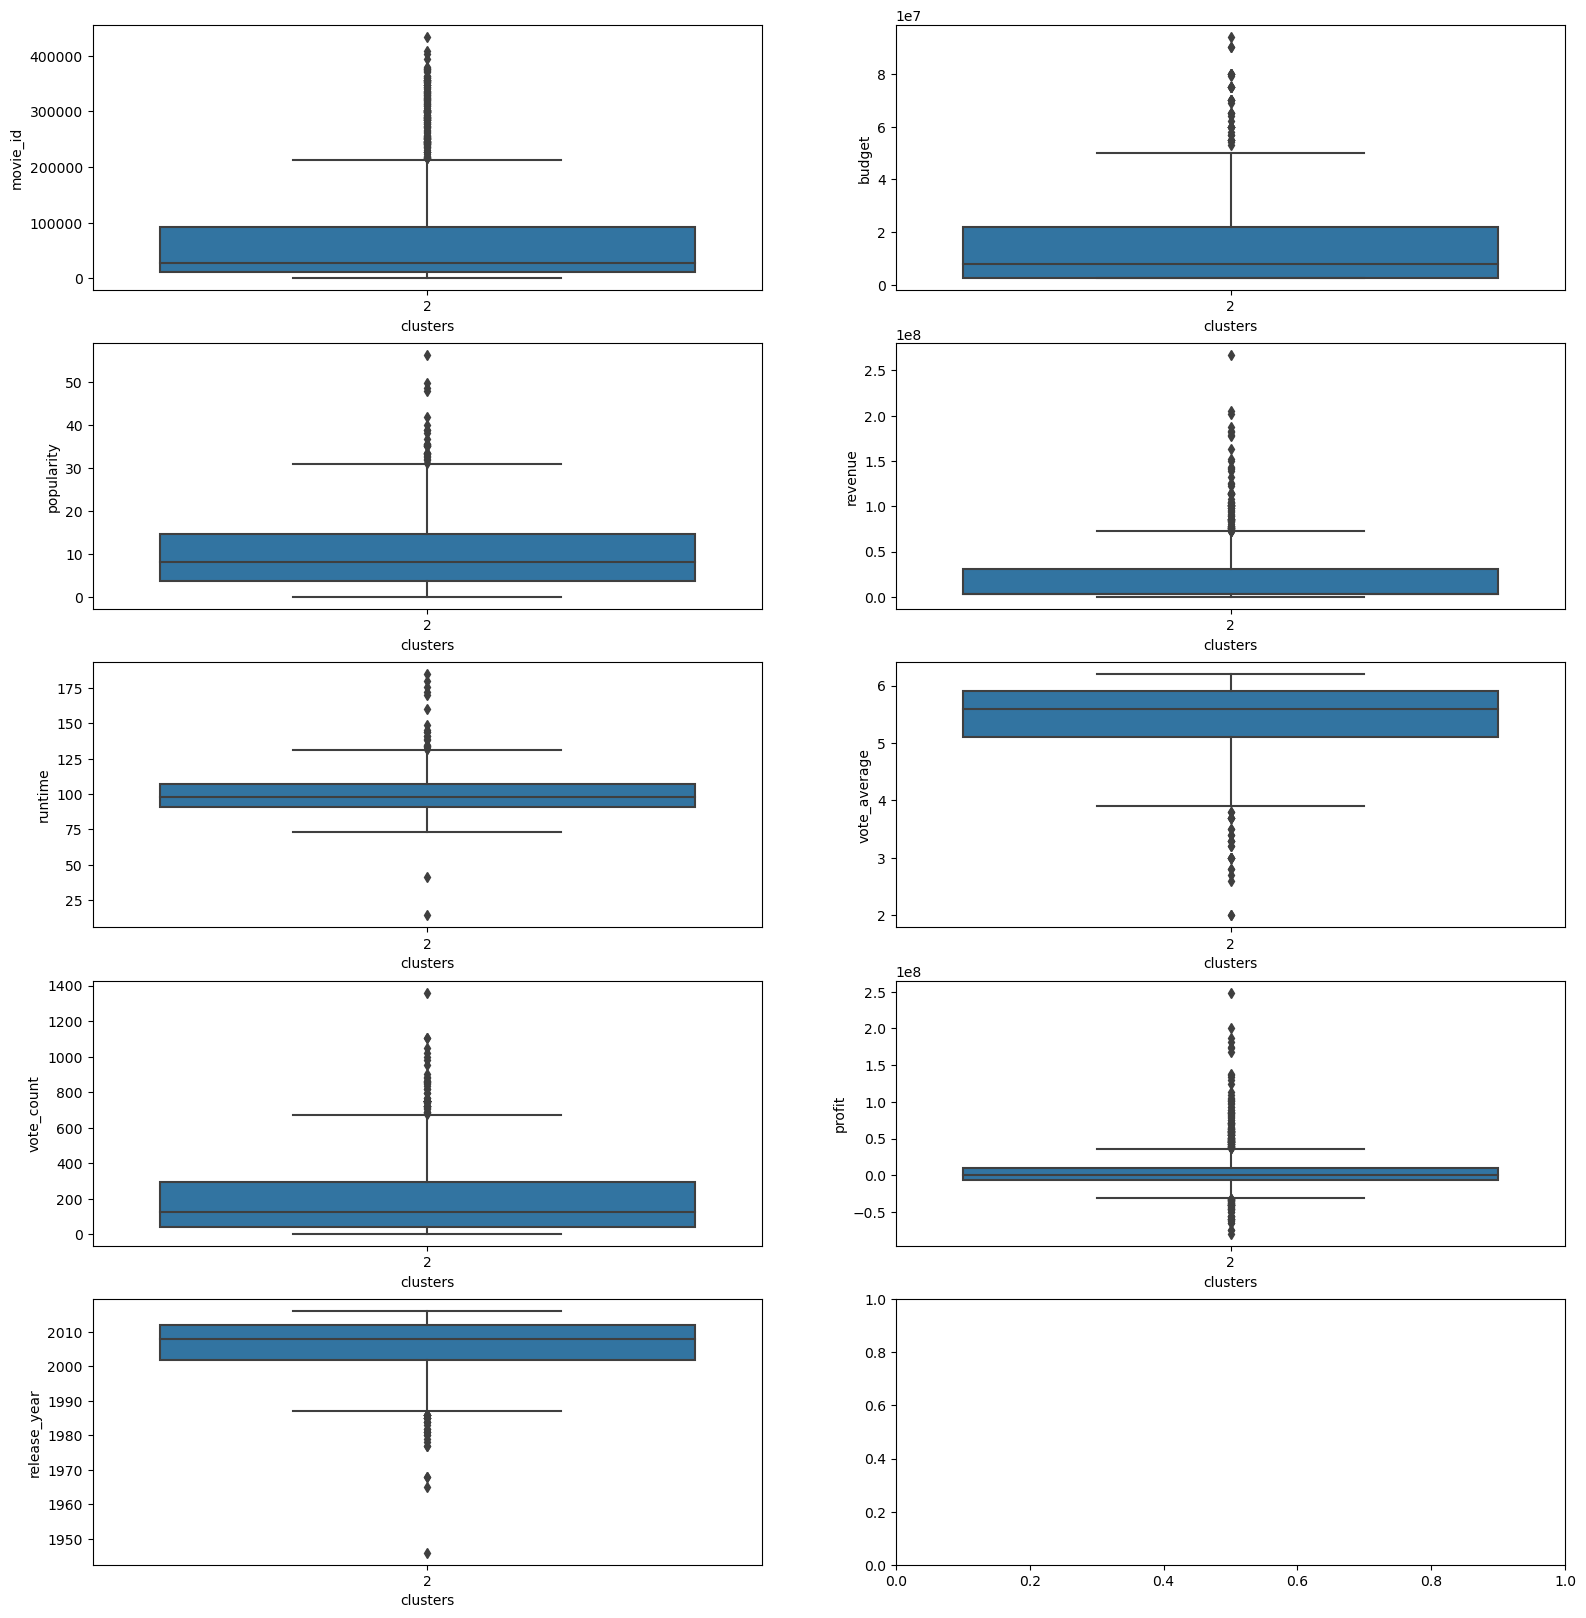

In [151]:
fig,ax=plt.subplots(5,2,figsize=(19,20))
ax=ax.ravel()
for i,j in zip(continuous,range(len(continuous))):
    sns.boxplot(data=low3,y=i,x='clusters',ax=ax[j])

##### KMeans has the best performance for clustering of the top rated movies

##### Through KMeans three optimal clusters have been formed in low rated movies.
##### The cluster 1 includes movies with budget and revenue higher than that of cluster 0 and 2. i.e., ~0.5-1B
##### The movies included in cluster 0 also have a higher vote count as compared to the cluster 1 and 2.
##### Between cluster 0 and 1, main influencing factor is the budget. Cluster 2 includes the movies with lowest budget among all 3 clusters.
